<img style="float:left" width="70%" src="../../documentacion/imagenes/escudo_COLOR_1L_DCHA.png">
<img style="float:right" width="10%" src="../../documentacion/imagenes/PythonLogo.svg">
<br style="clear:both;">


<h2 style="display: inline-block; padding: 4mm; padding-left: 2em; background-color: navy; line-height: 1.3em; color: white; border-radius: 10px;">6. Preprocessing</h2>


 
## Estudiante:

- Jose Luis Perez Gomez

In [145]:
#Si se quiere ejecutar este dataframe de manera manual de deben quitar los comentarios de esta celda excepto esta linea

%run 3.Importaciones.ipynb
%run 4.Variables_Clases.ipynb
dataframe_total = pd.read_csv('../datos/datosEEGTotal.csv', sep=';')



In [146]:
display(HTML(html_h4('Realizo la importacion a un Dataframe de los datos del csv aportado para el TFG datosEEGTotal.csv: ','blue')))
datosEEGTotal_csv = dataframe_total

In [147]:
display(HTML(html_h4('Voy a rellenar los datos missing que se observaron en la fase de Carga de datos de Key con la palabra Nothing  ', 'black')))
datosEEGTotal_csv_relleno = datosEEGTotal_csv.fillna("Nothing")
display(HTML(html_h5('Imprimo la info para revisar que no falte ningún dato, ahora no hay ningun dato missing', 'blue')))
datosEEGTotal_csv_relleno.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 726 entries, 0 to 725
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Timestamp   726 non-null    int64 
 1   Attention   726 non-null    int64 
 2   Meditation  726 non-null    int64 
 3   Delta       726 non-null    int64 
 4   Theta       726 non-null    int64 
 5   LowAlpha    726 non-null    int64 
 6   HighAlpha   726 non-null    int64 
 7   LowBeta     726 non-null    int64 
 8   HighBeta    726 non-null    int64 
 9   LowGamma    726 non-null    int64 
 10  HighGamma   726 non-null    int64 
 11  Signal      726 non-null    int64 
 12  Key         726 non-null    object
dtypes: int64(12), object(1)
memory usage: 73.9+ KB


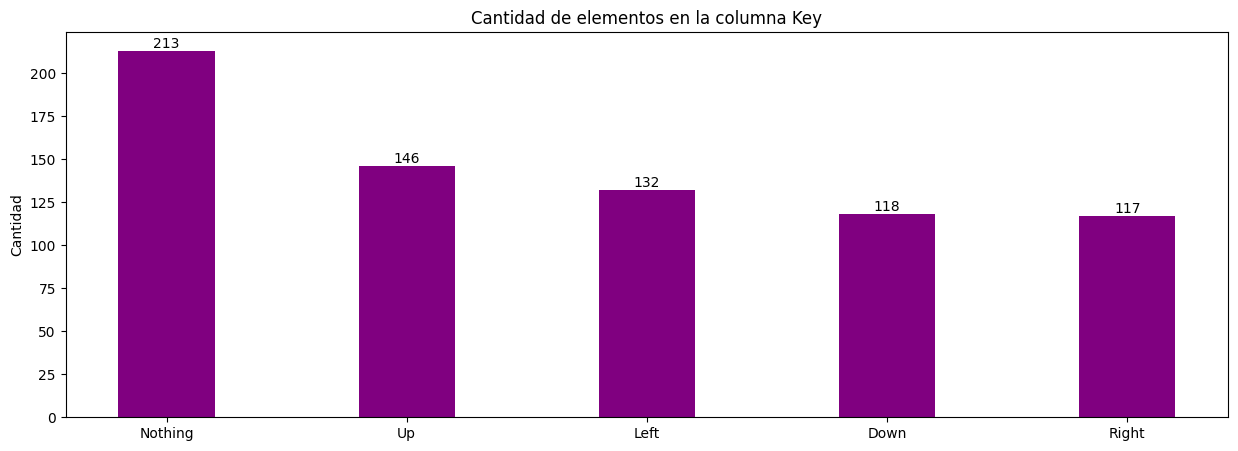

In [148]:
display(HTML(html_h4('Como se identifico en la fase de Carga de Datos, voy a modificar los datos de Key de LButton a Left  ', 'black')))

datosEEGTotal_relleno = datosEEGTotal_csv_relleno.replace({"LButton": 'Left'})

display(HTML(html_h5('Imprimo el grafico de barras para ver como estan de balanceados ahora los datos en la columna target= Key', 'blue')))

# creo la figura 
fig = plt.figure(figsize = (15, 5))
 
# calculo la cantidad de datos de cada elemento en la columna Key
counts = datosEEGTotal_relleno['Key'].value_counts()

# creo el el barplot
plt.bar(counts.index, counts.values, color ='purple', width = 0.4)

# se muestra por cada dato el total de cada elemento
for i, count in enumerate(counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom')

# etiquetas para el gráfico
plt.ylabel('Cantidad')
plt.title('Cantidad de elementos en la columna Key')

# Se muestra el gráfico
plt.show()

display(HTML(html_h5('Ahora ya se pueden orservar todos los datos target. Ya no aparece LButton que se ha integrado en Left y Nothing seria no pulsar hacia ninguna direccion del teclado', 'blue')))



In [149]:

display(HTML(html_h4('Elimino columna Signal tal y como se observo en la fase Carga de Datos porque no aporta nada significativo  ', 'black')))

datosEEGTotal_sinsignal = datosEEGTotal_relleno.drop(['Signal'],axis=1)
display(datosEEGTotal_sinsignal.columns)

display(HTML(html_h5('Ya no esta la caracteristica Signal en el conjunto de datos', 'blue')))


Index(['Timestamp', 'Attention', 'Meditation', 'Delta', 'Theta', 'LowAlpha',
       'HighAlpha', 'LowBeta', 'HighBeta', 'LowGamma', 'HighGamma', 'Key'],
      dtype='object')

In [150]:
display(HTML(html_h4('Voy a cambiar los datos de Key por numeros enteros float64 para que todos los datos del conjunto de datos sean numericos y asi poder experimentar con Machine y deep learning:  ', 'purple')))
display(HTML(html_h5('Utilizare esta variable: LABELS_NUM = {Left: "04", Right: "02" ,Up: "01", Down: "03",Nothing: "00"}  ''', 'blue')))
datosEEGTotal_sinsignal['Key'] = datosEEGTotal_sinsignal['Key'].replace(LABELS_NUM)
datosEEGTotal_sinsignal['Key'] = datosEEGTotal_sinsignal['Key'].astype('int64')
datosEEGTotal_sinsignal.head()

Timestamp  Attention  Meditation   Delta  Theta  LowAlpha  HighAlpha  \
0      54127         84          48   25253  14225      3441       4172   
1      55056         78          60    4946   5021      8879      13002   
2      56038         66          75  102896  14838     12817       8565   
3      57043         61          87   57763  12541      6173       5120   
4      58203         37          84   21560  74162     11297       9217   

   LowBeta  HighBeta  LowGamma  HighGamma  Key  
0     1881      9630      6863       5745    4  
1      879      6367      4314       3150    0  
2     2890     14525      9144      23072    0  
3     3238     10192      9048       6663    0  
4     4844      1945      2644       1678    0

In [151]:
display(HTML(html_h4('Divido el conjunto de datos en los 4 experimentos que se podian ver en la fase de Carga de datos y en las graficas de Timestamp ', 'purple')))
display(HTML(html_h4('Estos cuatro experimentos los exportare a csv con nombres correlativos por TimeStamp experimento_1.csv, experimento_2.csv, ... ', 'purple')))

import pandas as pd

last_timestamp = None
file_counter = 1

# Diccionario para almacenar los DataFrames independientes
df_dict = {}

# Inicializa el primer DataFrame para el primer segmento
df_segment = pd.DataFrame(columns=datosEEGTotal_sinsignal.columns)

# Itera sobre el DataFrame
for index, row in datosEEGTotal_sinsignal.iterrows():
    current_timestamp = row['Timestamp']
    
    # Si es el primer registro o si el timestamp actual es menor al anterior, crea un nuevo DataFrame y guarda el segmento anterior en el diccionario
    if last_timestamp is None or current_timestamp < last_timestamp:
        if last_timestamp is not None:
            # Almacena el DataFrame anterior en el diccionario
            df_dict[f'segmento_{file_counter}'] = df_segment
            file_counter += 1
        
        # Inicializa un nuevo DataFrame para el nuevo segmento
        df_segment = pd.DataFrame(columns=datosEEGTotal_sinsignal.columns)
    
    # Añade la fila actual al DataFrame del segmento actual
    df_segment = pd.concat([df_segment, row.to_frame().T])

    # Actualiza el timestamp anterior
    last_timestamp = current_timestamp

# Guarda el último segmento en el diccionario
if not df_segment.empty:
    df_dict[f'segmento_{file_counter}'] = df_segment

df_segmento_1 = df_dict['segmento_1'].astype('int64')
df_segmento_2 = df_dict['segmento_2'].astype('int64')
df_segmento_3 = df_dict['segmento_3'].astype('int64')
df_segmento_4 = df_dict['segmento_4'].astype('int64')



In [152]:
display(HTML(html_h4('Elimino columna Timestamp porque no influye el tiempo para pulsar Up, Down, Right or Left  ', 'black')))

dataframes_all= [df_segmento_1,df_segmento_2,df_segmento_3,df_segmento_4]
dataframes_sin_timestamp=[]

for data in dataframes_all:
    
    dataframes_sin_timestamp.append(data.drop(['Timestamp'],axis=1))

df_segmento_1_sin_timestamp = dataframes_sin_timestamp[0]
df_segmento_2_sin_timestamp = dataframes_sin_timestamp[1]
df_segmento_3_sin_timestamp = dataframes_sin_timestamp[2]
df_segmento_4_sin_timestamp = dataframes_sin_timestamp[3]

dataframes_sin_timestamp= [df_segmento_1_sin_timestamp, df_segmento_2_sin_timestamp, df_segmento_3_sin_timestamp, df_segmento_4_sin_timestamp]

In [153]:
display(HTML(html_h4('Voy a realizar el analis de posibles outliers en el conjunto de datos y saco por pantalla cuantos outliers hay por columna de datos y tambien cuales seran los indices que tienen un outliner.  ', 'purple')))

# Lista para guardar todos los indices donde hay outliners
exp_outliners = []
i=1

for data in dataframes_sin_timestamp:
    
  
    display(f'Experimento: {i}')
    
    # Calculo el z-score para cada valor en el DataFrame
    z_scores = stats.zscore(data)

    # Defino un umbral para los z-scores que considerará como outliers
    # https://en.wikipedia.org/wiki/68%E2%80%9395%E2%80%9399.7_rule
    umbral_zscore = 2 # 95.73%

    # Detecto los outliers basados en el z-score (valores cuyo valor absoluto de z-score es mayor que el umbral)
    outliers = (abs(z_scores) > umbral_zscore)

    # Cuento el número de outliers en cada columna
    num_outliers_por_columna = outliers.sum(axis=0)

    # Obtengo las filas y sus índices que son outliers en cada columna
    outliers_por_columna = {}
    for column in data.columns:
        outliers_index = outliers[outliers[column]].index
        outliers_por_columna[column] = outliers_index

    # Imprimo el número de outliers por cada columna
    display(HTML(html_h5('Número de outliers por columna:  ', 'blue')))
    display(num_outliers_por_columna)

    # Lista para almacenar todos los índices de outliers
    todos_indices_outliers = []

    # Almaceno todos los índices de outliers en una lista
    for indices in outliers_por_columna.values():
        todos_indices_outliers.extend(indices)

    # Convierto la lista de índices a un conjunto para eliminar duplicados
    conjunto_indices_outliers = set(todos_indices_outliers)

    # Saco una lista ordenada de los índices únicos
    indices_unicos_ordenados = sorted(list(conjunto_indices_outliers))

    # Imprimo los índices únicos ordenados
    display(HTML(html_h5('Índices únicos de outliers ordenados:  ', 'blue')))
    display(f'Total: {len(indices_unicos_ordenados)}')
    display(f'Lista: {indices_unicos_ordenados}')


    # Agregar el DataFrame filtrado a la lista
    exp_outliners.append(indices_unicos_ordenados)
    
    i = i+1


'Experimento: 1'

Attention     5
Meditation    5
Delta         7
Theta         7
LowAlpha      4
HighAlpha     6
LowBeta       6
HighBeta      5
LowGamma      6
HighGamma     2
Key           0
dtype: int64

'Total: 24'

'Lista: [2, 3, 8, 9, 10, 22, 23, 24, 36, 37, 48, 51, 52, 61, 63, 67, 68, 71, 72, 97, 112, 126, 127, 137]'

'Experimento: 2'

Attention      9
Meditation     8
Delta         12
Theta          5
LowAlpha       4
HighAlpha      4
LowBeta        5
HighBeta       4
LowGamma       6
HighGamma      6
Key            0
dtype: int64

'Total: 39'

'Lista: [142, 149, 150, 152, 155, 156, 157, 166, 169, 176, 177, 183, 186, 188, 201, 202, 204, 206, 212, 213, 217, 220, 221, 222, 227, 228, 236, 238, 242, 243, 247, 263, 268, 282, 283, 284, 288, 303, 304]'

'Experimento: 3'

Attention      9
Meditation    13
Delta         12
Theta          3
LowAlpha       2
HighAlpha      3
LowBeta        1
HighBeta       5
LowGamma       3
HighGamma      4
Key            0
dtype: int64

'Total: 33'

'Lista: [311, 313, 314, 321, 322, 323, 334, 354, 391, 393, 394, 395, 402, 403, 404, 414, 419, 420, 421, 432, 454, 474, 494, 495, 496, 497, 498, 503, 505, 506, 507, 508, 509]'

'Experimento: 4'

Attention     12
Meditation    13
Delta         11
Theta          2
LowAlpha       5
HighAlpha      7
LowBeta       12
HighBeta       7
LowGamma      10
HighGamma     10
Key            0
dtype: int64

'Total: 59'

'Lista: [510, 511, 512, 513, 515, 516, 517, 518, 519, 520, 521, 526, 535, 536, 540, 545, 548, 556, 569, 572, 573, 576, 586, 612, 613, 614, 617, 621, 625, 635, 640, 644, 651, 655, 658, 661, 665, 668, 670, 676, 677, 678, 691, 695, 696, 700, 703, 704, 705, 707, 710, 711, 712, 713, 714, 715, 716, 717, 719]'

In [154]:

dataframes_sin_outliers = []

# Itero sobre la lista de indices donde hay outliners y aplico el proceso de eliminadoa cada uno de ellos
for outlier, indice in zip(exp_outliners, dataframes_sin_timestamp):

    dataframe = indice.drop(outlier)

    # Reseteo los indices para que no haya saltos de numeraciones en los propios indices
    dataframes_sin_outliers.append(dataframe.reset_index(drop=True))

display(HTML(html_h5('Total de lineas antes y despues del borrado de los outliers.  ', 'blue')))# Itero sobre la lista de indices donde hay outliners y aplico el proceso de eliminadoa cada uno de elloso

dataframes_sin_outliers_all = pd.concat([dataframes_sin_outliers[0], dataframes_sin_outliers[1], dataframes_sin_outliers[2], dataframes_sin_outliers[3]], axis=0)
dataframes_sin_outliers_all = dataframes_sin_outliers_all.reset_index(drop=True)

display(f'Antes: {len(datosEEGTotal_sinsignal)}')
display(f'Despues: {len(dataframes_sin_outliers_all)}')



'Antes: 726'

'Despues: 571'

In [155]:
display(HTML(html_h4('Se va a normalizar con StandardScaler los datos del conjunto de datos, como se observo en la fase de Carga de datos, excepto de Timestamp y de Key porque son datos que no deben modificarse para un correcto analisis.  ', 'black')))
#https://medium.com/@onersarpnalcin/standardscaler-vs-minmaxscaler-vs-robustscaler-which-one-to-use-for-your-next-ml-project-ae5b44f571b9

columnas = ['Attention', 'Meditation', 'Delta', 'Theta', 'LowAlpha', 'HighAlpha', 'LowBeta', 'HighBeta', 'LowGamma', 'HighGamma']

df_segmento_1_standarizado = pd.DataFrame(StandardScaler().fit_transform(dataframes_sin_outliers[0][columnas]), columns=columnas)
df_segmento_2_standarizado = pd.DataFrame(StandardScaler().fit_transform(dataframes_sin_outliers[1][columnas]), columns=columnas)
df_segmento_3_standarizado = pd.DataFrame(StandardScaler().fit_transform(dataframes_sin_outliers[2][columnas]), columns=columnas)
df_segmento_4_standarizado = pd.DataFrame(StandardScaler().fit_transform(dataframes_sin_outliers[3][columnas]), columns=columnas)
df_todos_standarizado = pd.DataFrame(StandardScaler().fit_transform(dataframes_sin_outliers_all[columnas]), columns=columnas)


datosEEG_seg1_stdscaler = pd.concat([df_segmento_1_standarizado, dataframes_sin_outliers[0]['Key']], axis=1).astype('float64')
datosEEG_seg2_stdscaler = pd.concat([df_segmento_2_standarizado, dataframes_sin_outliers[1]['Key']], axis=1).astype('float64')
datosEEG_seg3_stdscaler = pd.concat([df_segmento_3_standarizado, dataframes_sin_outliers[2]['Key']], axis=1).astype('float64')
datosEEG_seg4_stdscaler = pd.concat([df_segmento_4_standarizado, dataframes_sin_outliers[3]['Key']], axis=1).astype('float64')


datos_stdscaler_after = pd.concat([df_segmento_1_standarizado, df_segmento_2_standarizado, df_segmento_3_standarizado, df_segmento_4_standarizado], axis=0)
datos_stdscaler_after = datos_stdscaler_after.reset_index(drop=True)
datosEEG_stdscaler_after = pd.concat([datos_stdscaler_after, dataframes_sin_outliers_all['Key']], axis=1).astype('float64')

datosEEG_stdscaler_before = pd.concat([df_todos_standarizado, dataframes_sin_outliers_all['Key']], axis=1).astype('float64')


display(HTML(html_h4('Conjunto de datos antes de la Estandarizacion:  ', 'purple')))
display(dataframes_sin_outliers_all)
display(HTML(html_h4('Conjunto de datos una vez estandarizado con StandardScaler el conjunto de datos despues de standarizar cada uno de los segmento:  ', 'purple')))
display(datosEEG_stdscaler_after)
display(HTML(html_h4('Conjunto de datos una vez estandarizado con StandardScaler el conjunto de datos sin haberlo dividido en segmentos:.  ', 'purple')))
display(datosEEG_stdscaler_before)





Attention  Meditation   Delta  Theta  LowAlpha  HighAlpha  LowBeta  \
0           84          48   25253  14225      3441       4172     1881   
1           78          60    4946   5021      8879      13002      879   
2           37          84   21560  74162     11297       9217     4844   
3           48          63    2540   1384       692        467     1313   
4           56          48    3622   5051      3037       1270     8368   
..         ...         ...     ...    ...       ...        ...      ...   
566         81          37    4088  13782       756       5536     7114   
567         84          20    3490  13947      2299       2051     3315   
568         84          38    3619   8525      5623       6665     5345   
569         83          51  116972   5464      1405       6395     2285   
570         57          44  120133  59585      2946       1584     5438   

     HighBeta  LowGamma  HighGamma  Key  
0        9630      6863       5745    4  
1        6367      4314       3150    0  
2        1945      2644       1678    0  
3        2271      2560        445    0  
4       12164      7412       4003    0  
..        ...       ...        ...  ...  
566     24230     12942      14061    2  
567     22789     17542       9966    2  
568     31352     22837      12553    2  
569      7186      5351       1219    2  
570      6210      3140       1884    0  

[571 rows x 11 columns]

Attention  Meditation     Delta     Theta  LowAlpha  HighAlpha   LowBeta  \
0     1.885264   -1.719525 -0.225628  0.560992 -0.007624  -0.047853 -0.512495   
1     1.453697   -0.855658 -0.313095 -0.321740  1.644439   2.678216 -1.080935   
2    -1.495340    0.872076 -0.241535  6.309394  2.379026   1.509680  1.168429   
3    -0.704135   -0.639691 -0.323459 -0.670555 -0.842770  -1.191690 -0.834725   
4    -0.128713   -1.719525 -0.318798 -0.318863 -0.130359  -0.943782  3.167612   
..         ...         ...       ...       ...       ...        ...       ...   
566  -0.302871   -0.217565 -0.300173  0.608415 -1.025892   0.564480  0.706642   
567  -0.079628   -1.676566 -0.317466  0.629859 -0.526117  -0.698286 -0.569207   
568  -0.079628   -0.131742 -0.313736 -0.074825  0.550519   0.973565  0.112544   
569  -0.154042    0.983964  2.964252 -0.472656 -0.815682   0.875732 -0.915121   
570  -2.088813    0.383200  3.055663  6.561321 -0.316555  -0.867500  0.143777   

     HighBeta  LowGamma  HighGamma  Key  
0    1.724231  2.734178   3.324146  4.0  
1    0.576437  1.023637   1.032174  0.0  
2   -0.979048 -0.097039  -0.267935  0.0  
3   -0.864374 -0.153409  -1.356953  0.0  
4    2.615592  3.102592   1.785566  0.0  
..        ...       ...        ...  ...  
566  0.382142 -0.870729   1.408729  2.0  
567  0.225086 -0.305055   0.371175  2.0  
568  1.158376  0.346086   1.026646  2.0  
569 -1.475501 -1.804215  -1.845060  2.0  
570 -1.581877 -2.076107  -1.676568  0.0  

[571 rows x 11 columns]

Attention  Meditation     Delta     Theta  LowAlpha  HighAlpha   LowBeta  \
0     0.668318   -0.286308 -0.159810  0.021716 -0.246210  -0.096782 -0.590275   
1     0.381214    0.364798 -0.306238 -0.407928  0.576454   1.796887 -0.813819   
2    -1.580667    1.667011 -0.186439  2.819583  0.942251   0.985161  0.070765   
3    -1.054309    0.527575 -0.323587 -0.577704 -0.662081  -0.891351 -0.716994   
4    -0.671503   -0.286308 -0.315785 -0.406528 -0.307328  -0.719141  0.856962   
..         ...         ...       ...       ...       ...        ...       ...   
566   0.524766   -0.883155 -0.312425  0.001036 -0.652399   0.195739  0.577197   
567   0.668318   -1.805556 -0.316737  0.008739 -0.418973  -0.551649 -0.270352   
568   0.668318   -0.828897 -0.315807 -0.244361  0.083884   0.437863  0.182537   
569   0.620467   -0.123532  0.501549 -0.387249 -0.554218   0.379959 -0.500143   
570  -0.623652   -0.503344  0.524342  2.139127 -0.321094  -0.651801  0.203285   

     HighBeta  LowGamma  HighGamma  Key  
0   -0.088998 -0.155154   0.396823  4.0  
1   -0.439271 -0.439102  -0.263215  0.0  
2   -0.913960 -0.625133  -0.637618  0.0  
3   -0.878965 -0.634491  -0.951232  0.0  
4    0.183019 -0.093997  -0.046255  0.0  
..        ...       ...        ...  ...  
566  1.478268  0.522023   2.511997  2.0  
567  1.323581  1.034444   1.470434  2.0  
568  2.242793  1.624286   2.128438  2.0  
569 -0.351354 -0.323584  -0.754365  2.0  
570 -0.456125 -0.569881  -0.585222  0.0  

[571 rows x 11 columns]

Evaluación de normalidad de los datos originales:




Análisis de la columna: Attention


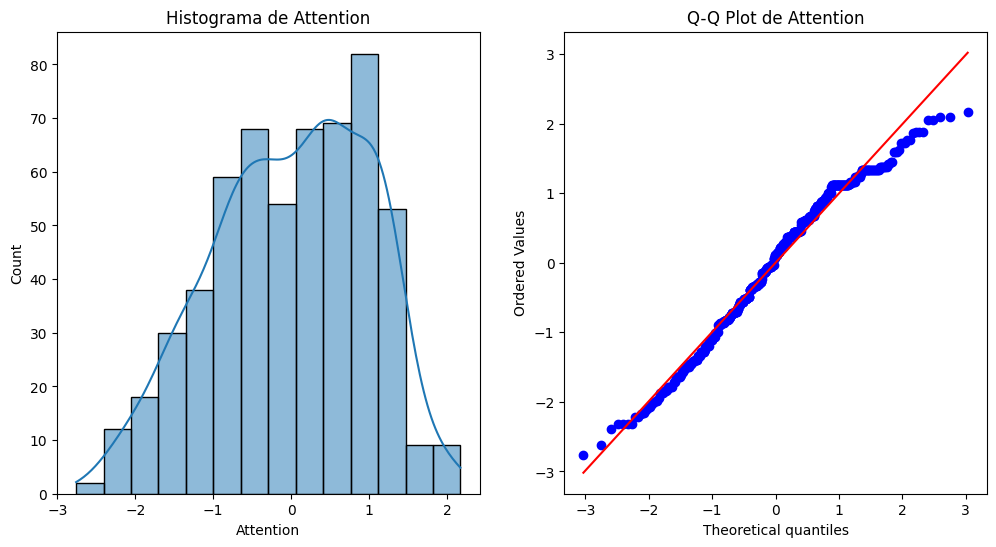

Prueba de Shapiro-Wilk
Estadístico: 0.9804970026016235
p-valor: 6.543660902025294e-07




Análisis de la columna: Meditation


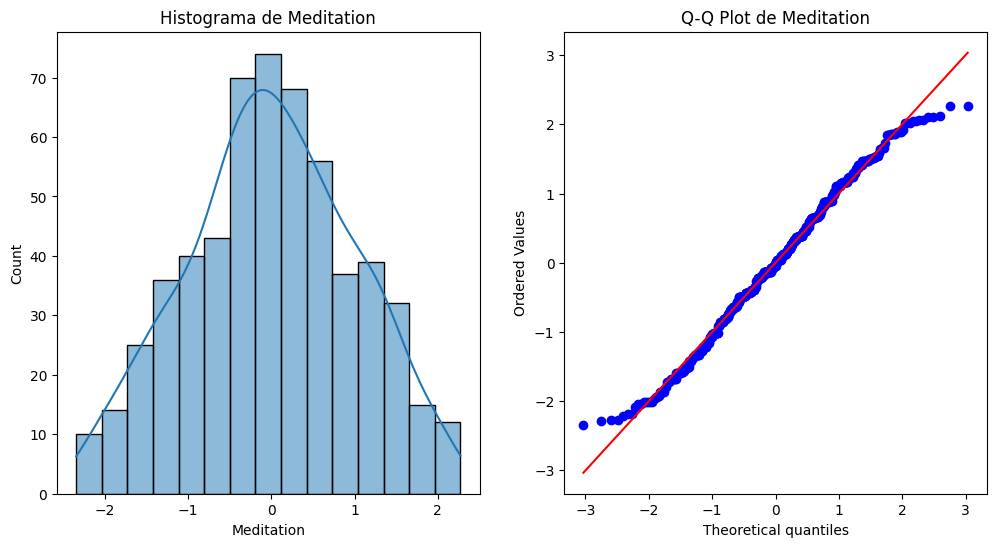

Prueba de Shapiro-Wilk
Estadístico: 0.9915060997009277
p-valor: 0.002338895807042718




Análisis de la columna: Delta


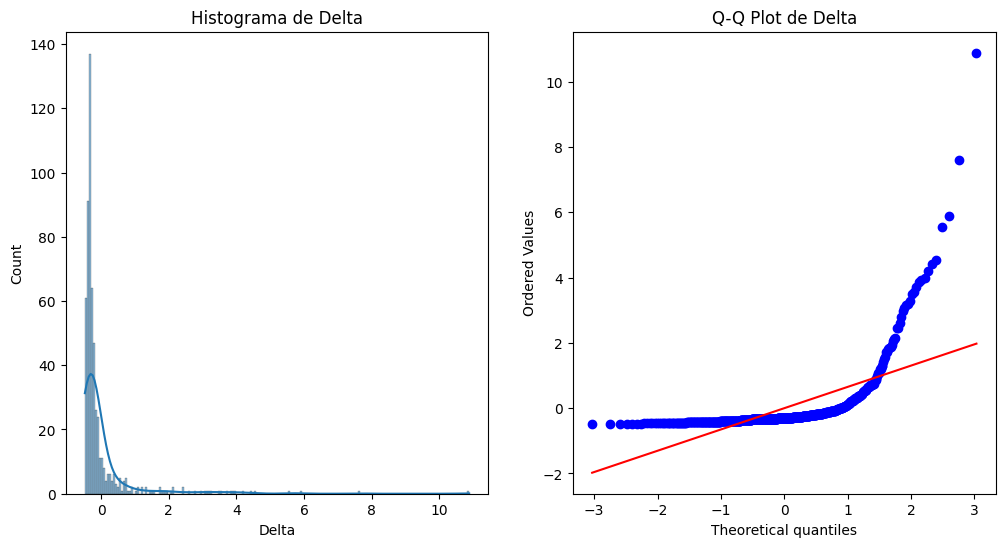

Prueba de Shapiro-Wilk
Estadístico: 0.42613518238067627
p-valor: 4.955429976271887e-39




Análisis de la columna: Theta


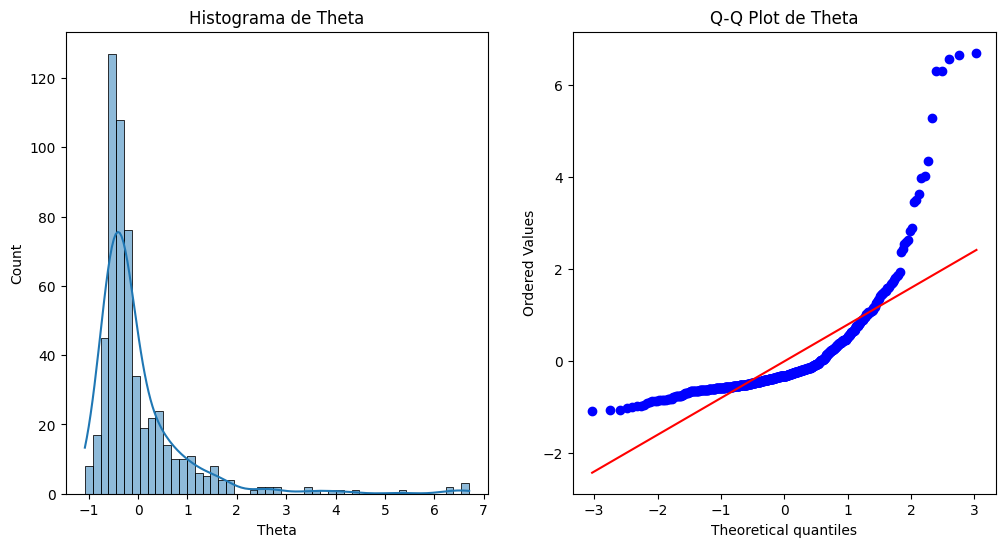

Prueba de Shapiro-Wilk
Estadístico: 0.6340315341949463
p-valor: 4.2132270560263976e-33




Análisis de la columna: LowAlpha


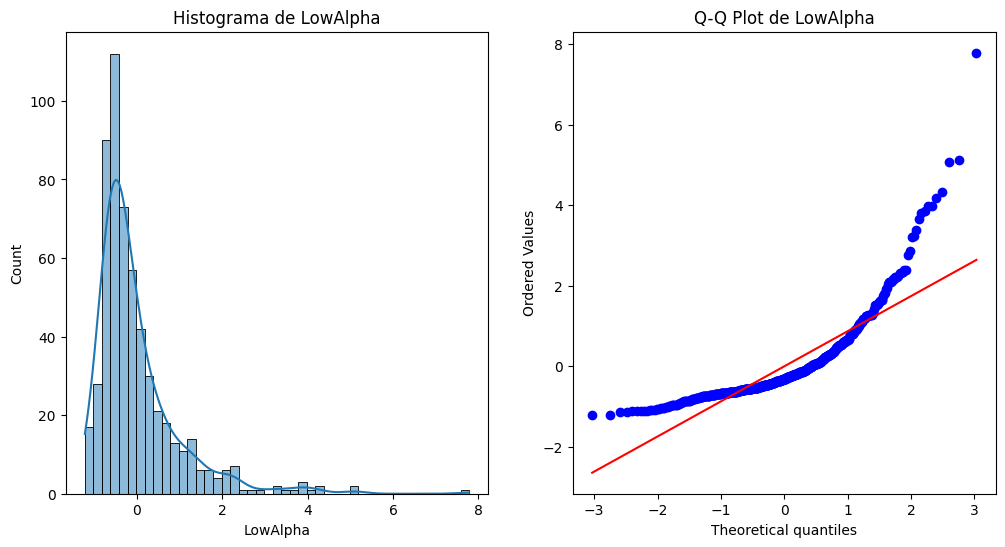

Prueba de Shapiro-Wilk
Estadístico: 0.7550121545791626
p-valor: 3.047303376730433e-28




Análisis de la columna: HighAlpha


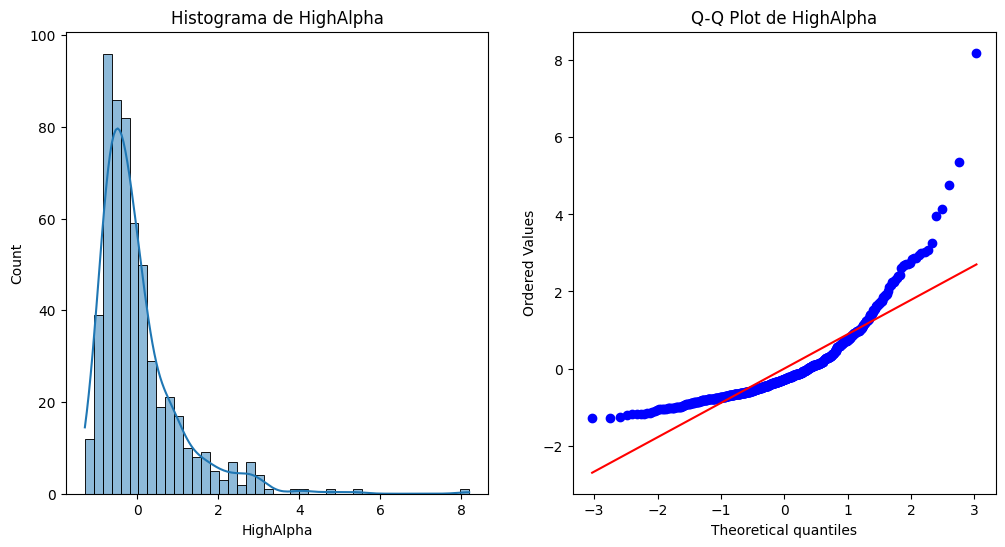

Prueba de Shapiro-Wilk
Estadístico: 0.7904077172279358
p-valor: 1.8351474616358525e-26




Análisis de la columna: LowBeta


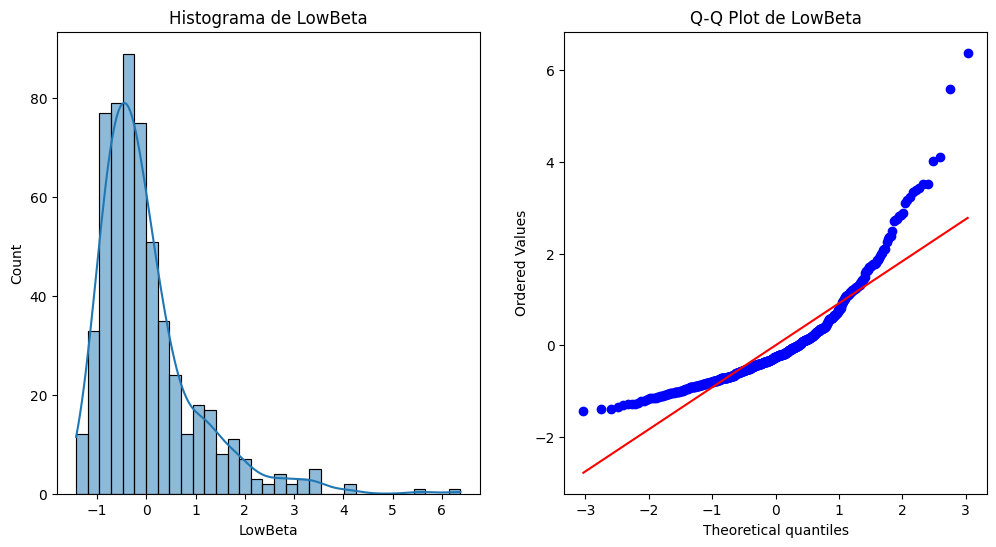

Prueba de Shapiro-Wilk
Estadístico: 0.8335831165313721
p-valor: 6.056938322450704e-24




Análisis de la columna: HighBeta


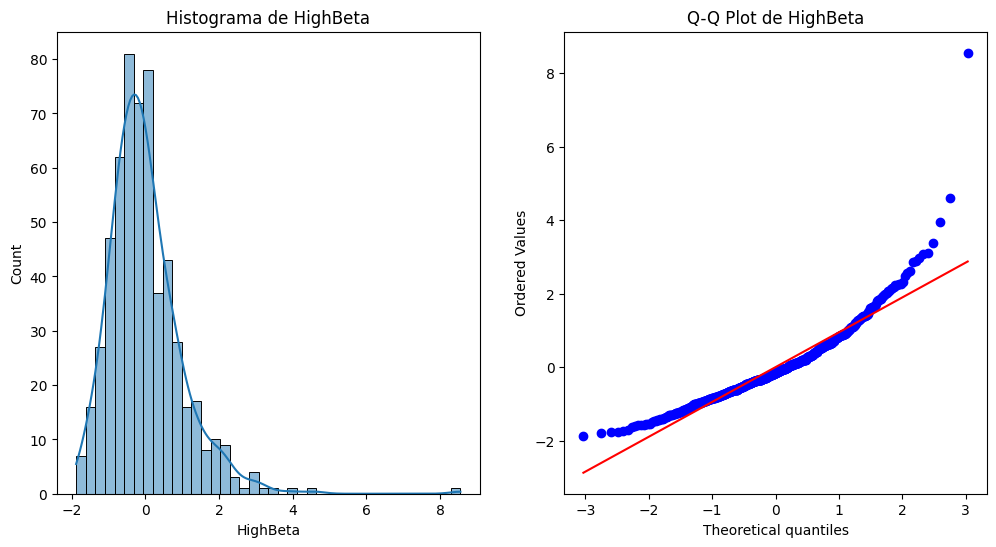

Prueba de Shapiro-Wilk
Estadístico: 0.8937488794326782
p-valor: 1.986474241046096e-19




Análisis de la columna: LowGamma


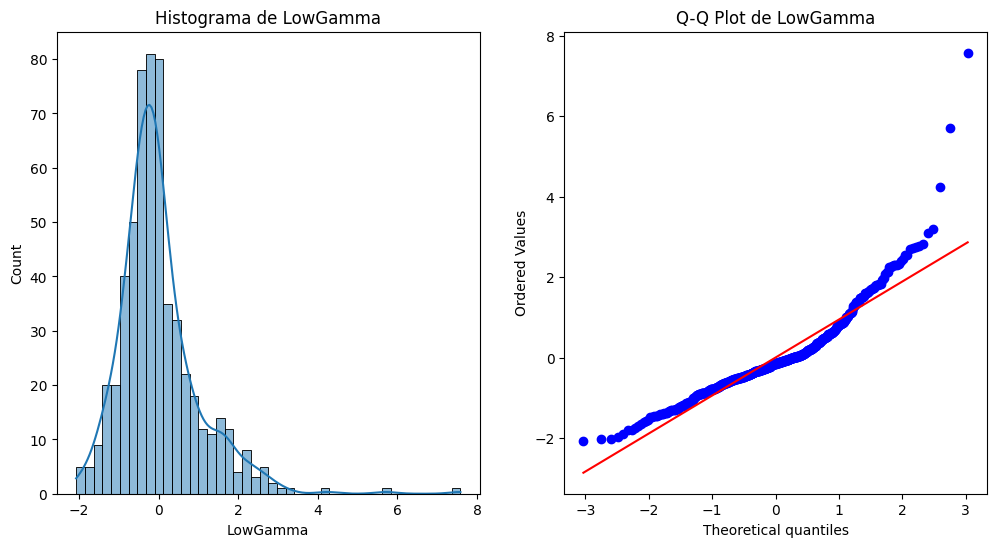

Prueba de Shapiro-Wilk
Estadístico: 0.8880841135978699
p-valor: 6.326947470348694e-20




Análisis de la columna: HighGamma


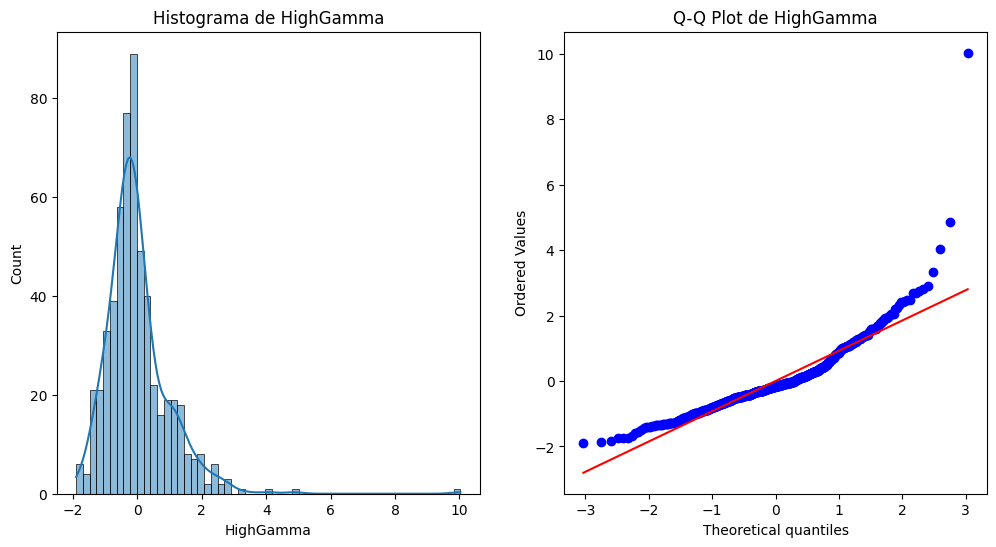

Prueba de Shapiro-Wilk
Estadístico: 0.8519262671470642
p-valor: 1.014731661680599e-22




Análisis de la columna: Key


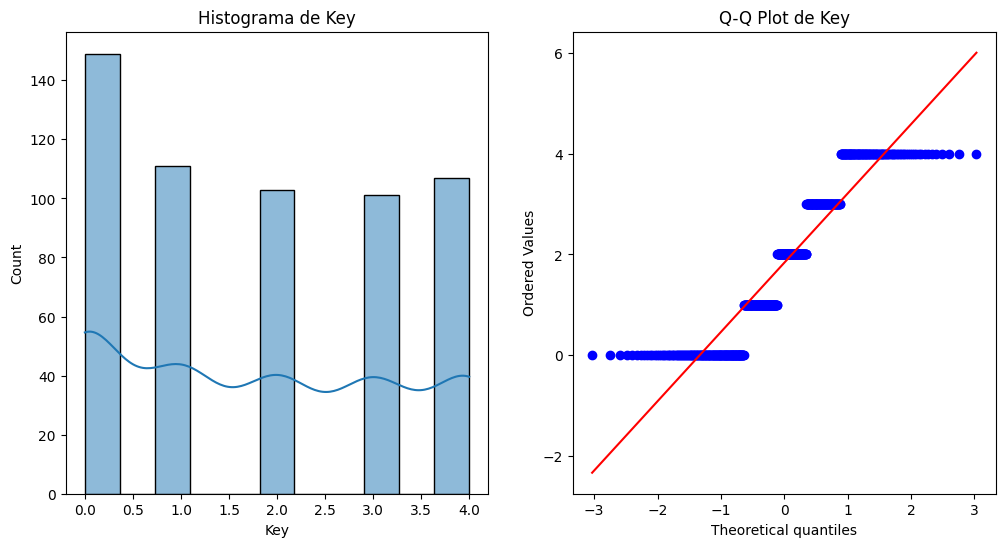

Prueba de Shapiro-Wilk
Estadístico: 0.8729212284088135
p-valor: 3.607249833019224e-21




Análisis de la columna: Attention


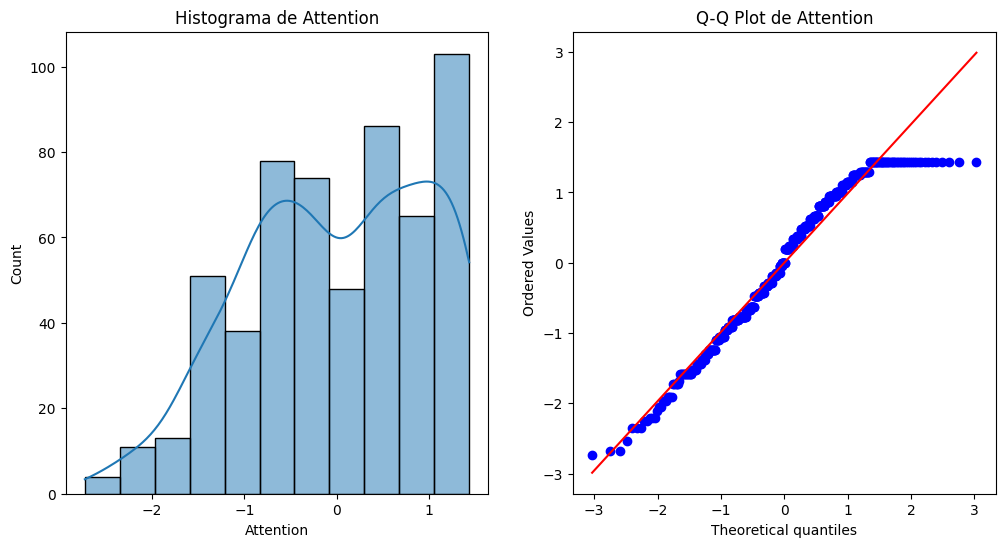

Prueba de Shapiro-Wilk
Estadístico: 0.9593671560287476
p-valor: 1.878643074437747e-11




Análisis de la columna: Meditation


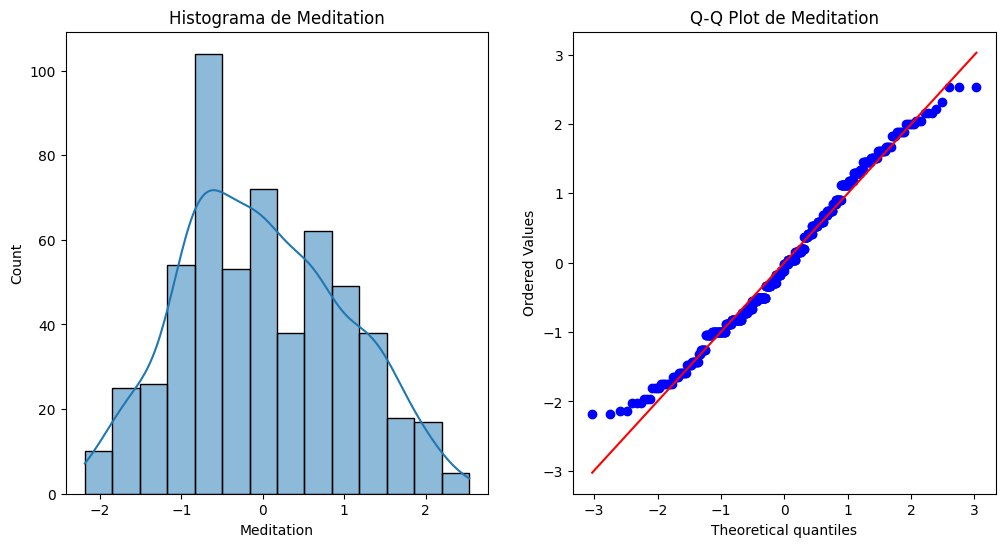

Prueba de Shapiro-Wilk
Estadístico: 0.9859813451766968
p-valor: 2.6724845156422816e-05




Análisis de la columna: Delta


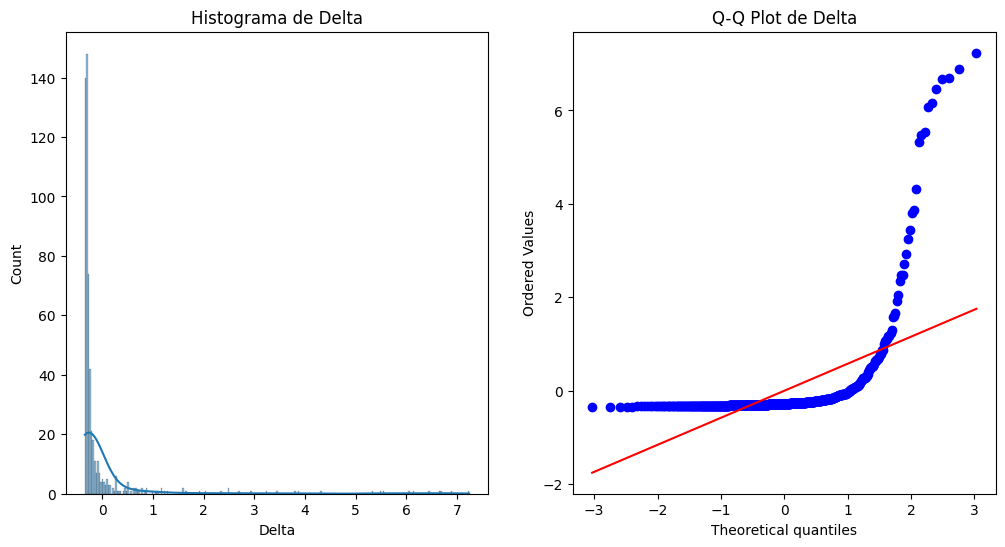

Prueba de Shapiro-Wilk
Estadístico: 0.3343202471733093
p-valor: 4.23374305026457e-41




Análisis de la columna: Theta


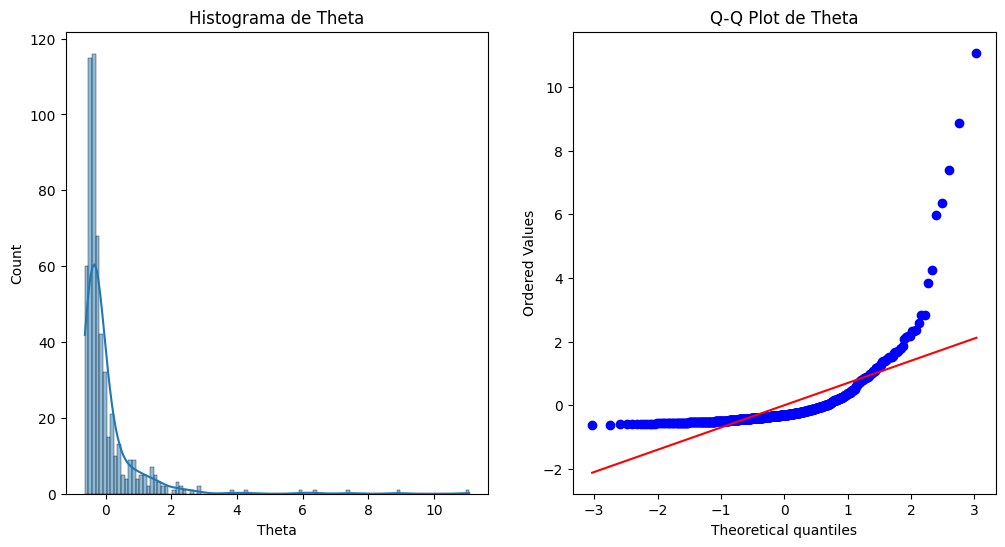

Prueba de Shapiro-Wilk
Estadístico: 0.4892427325248718
p-valor: 1.904117087656688e-37




Análisis de la columna: LowAlpha


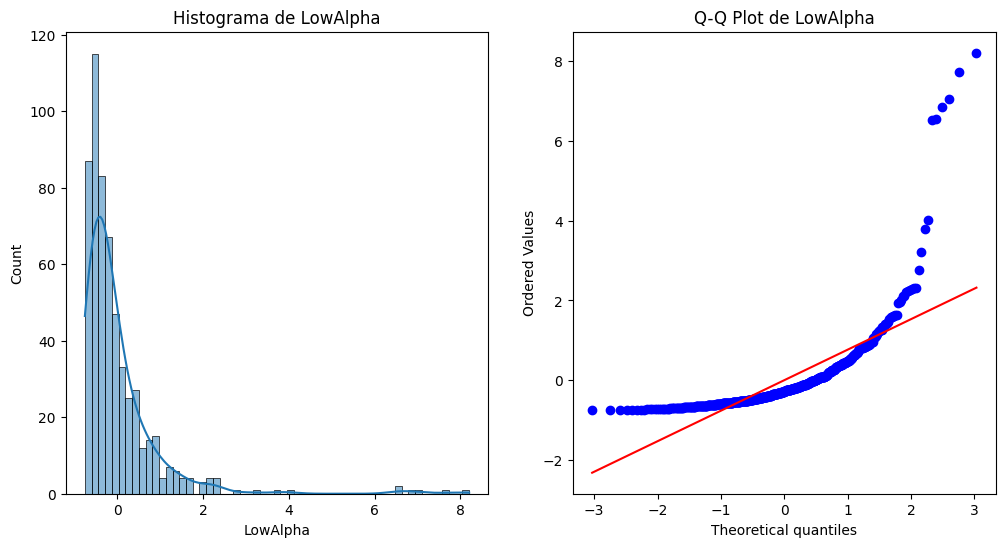

Prueba de Shapiro-Wilk
Estadístico: 0.5833083391189575
p-valor: 9.249490945871665e-35




Análisis de la columna: HighAlpha


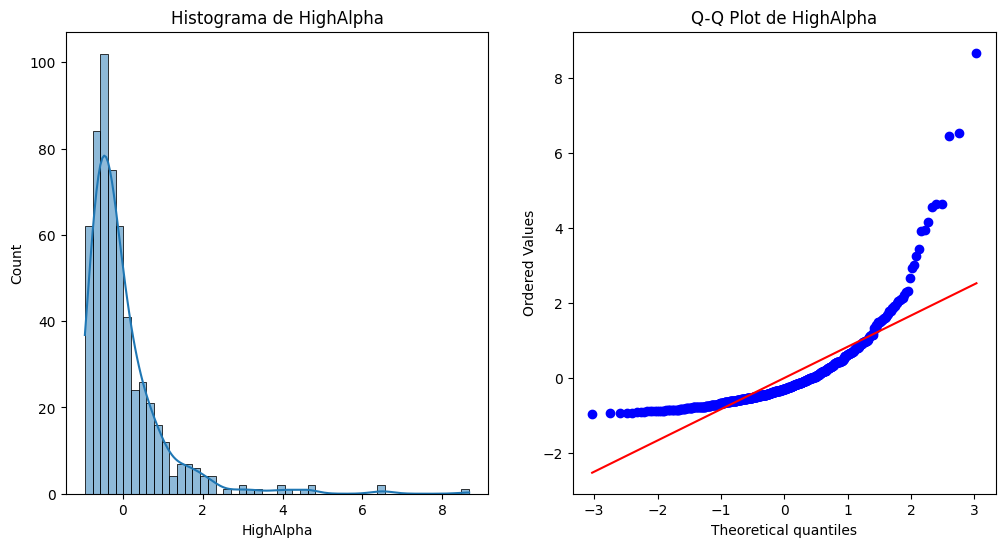

Prueba de Shapiro-Wilk
Estadístico: 0.6913568377494812
p-valor: 5.456431306742949e-31




Análisis de la columna: LowBeta


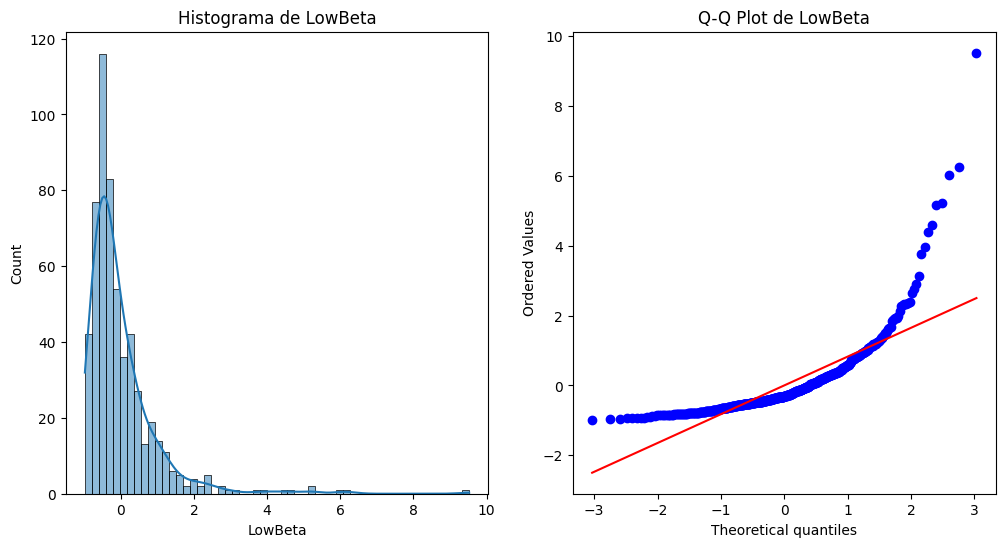

Prueba de Shapiro-Wilk
Estadístico: 0.6779406070709229
p-valor: 1.6450900029447113e-31




Análisis de la columna: HighBeta


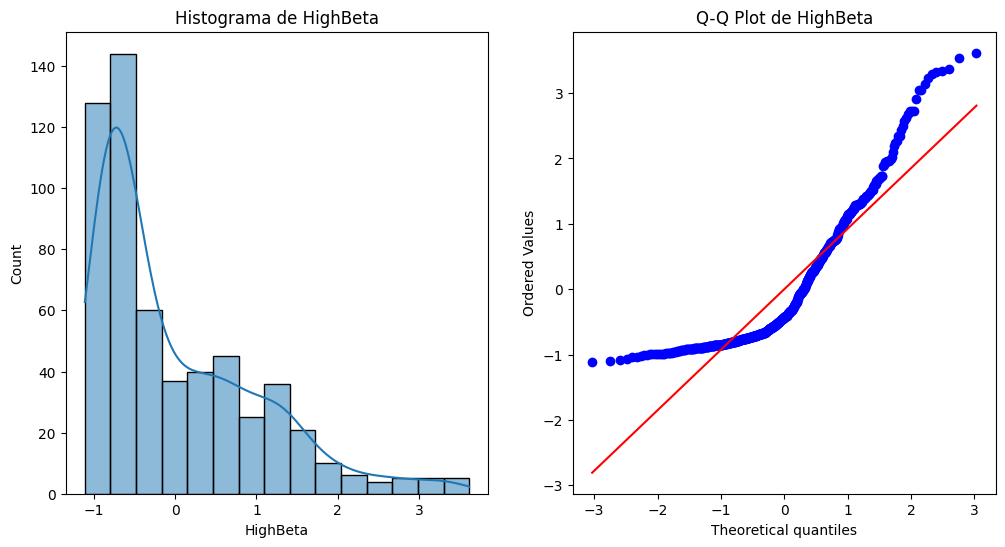

Prueba de Shapiro-Wilk
Estadístico: 0.8479766845703125
p-valor: 5.412981146985296e-23




Análisis de la columna: LowGamma


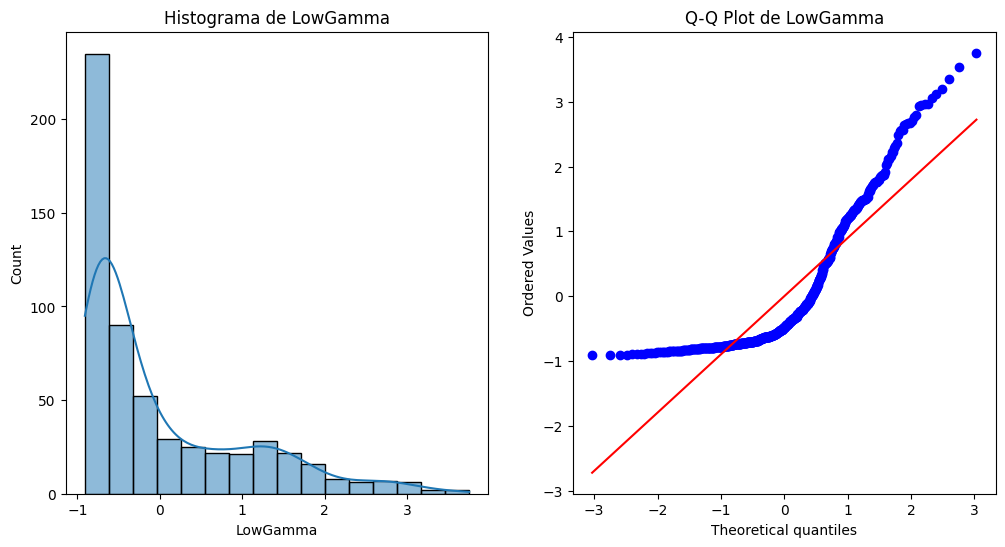

Prueba de Shapiro-Wilk
Estadístico: 0.7986621856689453
p-valor: 5.152515568524201e-26




Análisis de la columna: HighGamma


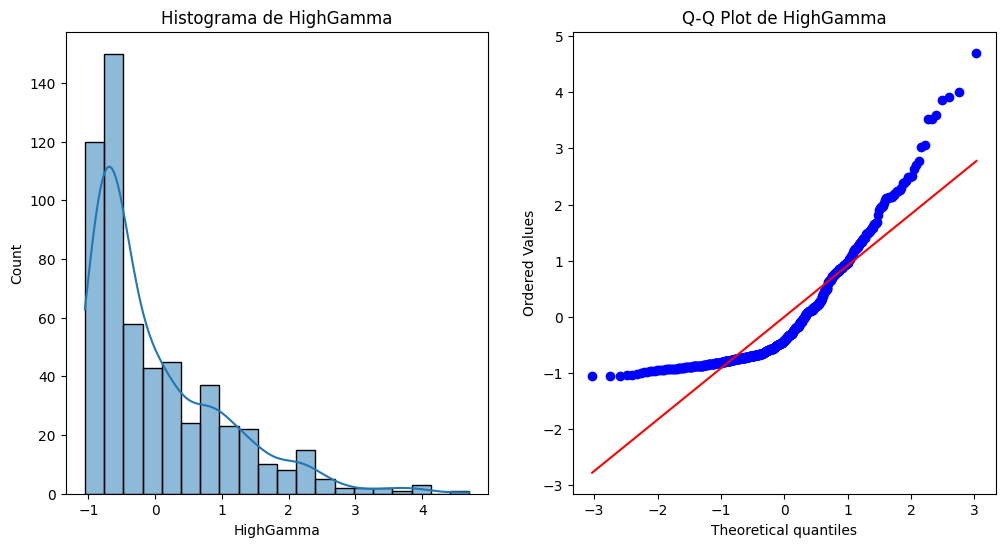

Prueba de Shapiro-Wilk
Estadístico: 0.8302042484283447
p-valor: 3.699261846407614e-24




Análisis de la columna: Key


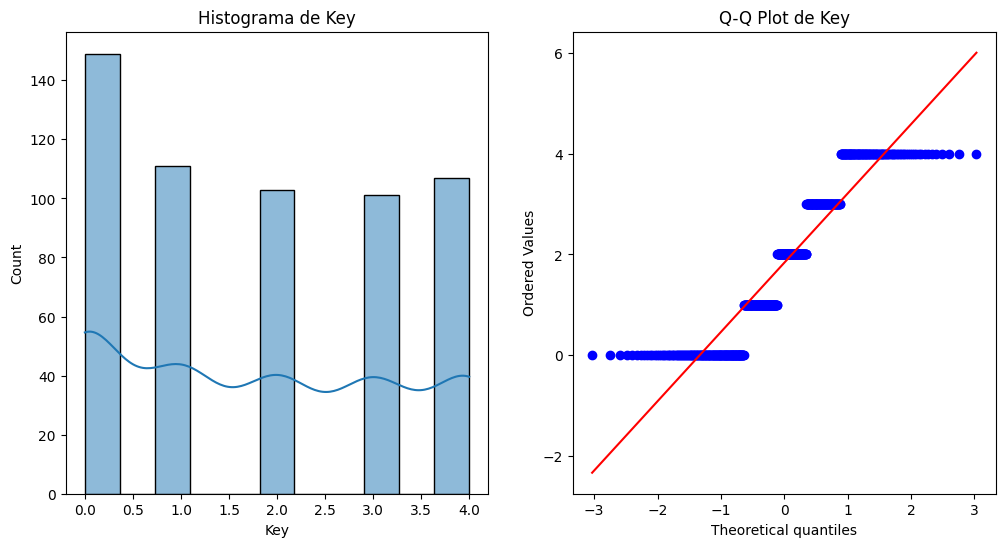

Prueba de Shapiro-Wilk
Estadístico: 0.8729212284088135
p-valor: 3.607249833019224e-21


In [156]:
def evaluar_normalidad(datos_histograma, columnas):
    for columna in columnas:
        print('')
        print(f'\nAnálisis de la columna: {columna}')
        
        # Histograma
        plt.figure(figsize=(12, 6))
        plt.subplot(1, 2, 1)
        sns.histplot(datos_histograma[columna], kde=True)
        plt.title(f'Histograma de {columna}')
        
        # Q-Q Plot
        plt.subplot(1, 2, 2)
        stats.probplot(datos_histograma[columna], dist="norm", plot=plt)
        plt.title(f'Q-Q Plot de {columna}')
        plt.show()
        
        # Prueba de Shapiro-Wilk
        stats_shapiro, p_value = stats.shapiro(datos_histograma[columna])
        print('Prueba de Shapiro-Wilk')
        print('Estadístico:', stats_shapiro)
        print('p-valor:', p_value)
        if p_value > 0.05:
            display(HTML(html_h4('La muestra parece gaussiana', 'purple')))
        else:
            display(HTML(html_h4('La muestra no parece gaussiana', 'purple')))

# Evaluar normalidad de los datos originales
print("Evaluación de normalidad de los datos originales:")

display(HTML(html_h4('Evaluacion de la normalizacion despues del standarizado con el conjunto de datos datosEEG_stdscaler_after:.  ', 'purple')))

evaluar_normalidad(datosEEG_stdscaler_after, datosEEG_stdscaler_after.columns)

display(HTML(html_h4('Evaluacion de la normalizacion despues del standarizado con el conjunto de datos datosEEG_stdscaler_before:.  ', 'purple')))

evaluar_normalidad(datosEEG_stdscaler_before, datosEEG_stdscaler_before.columns)

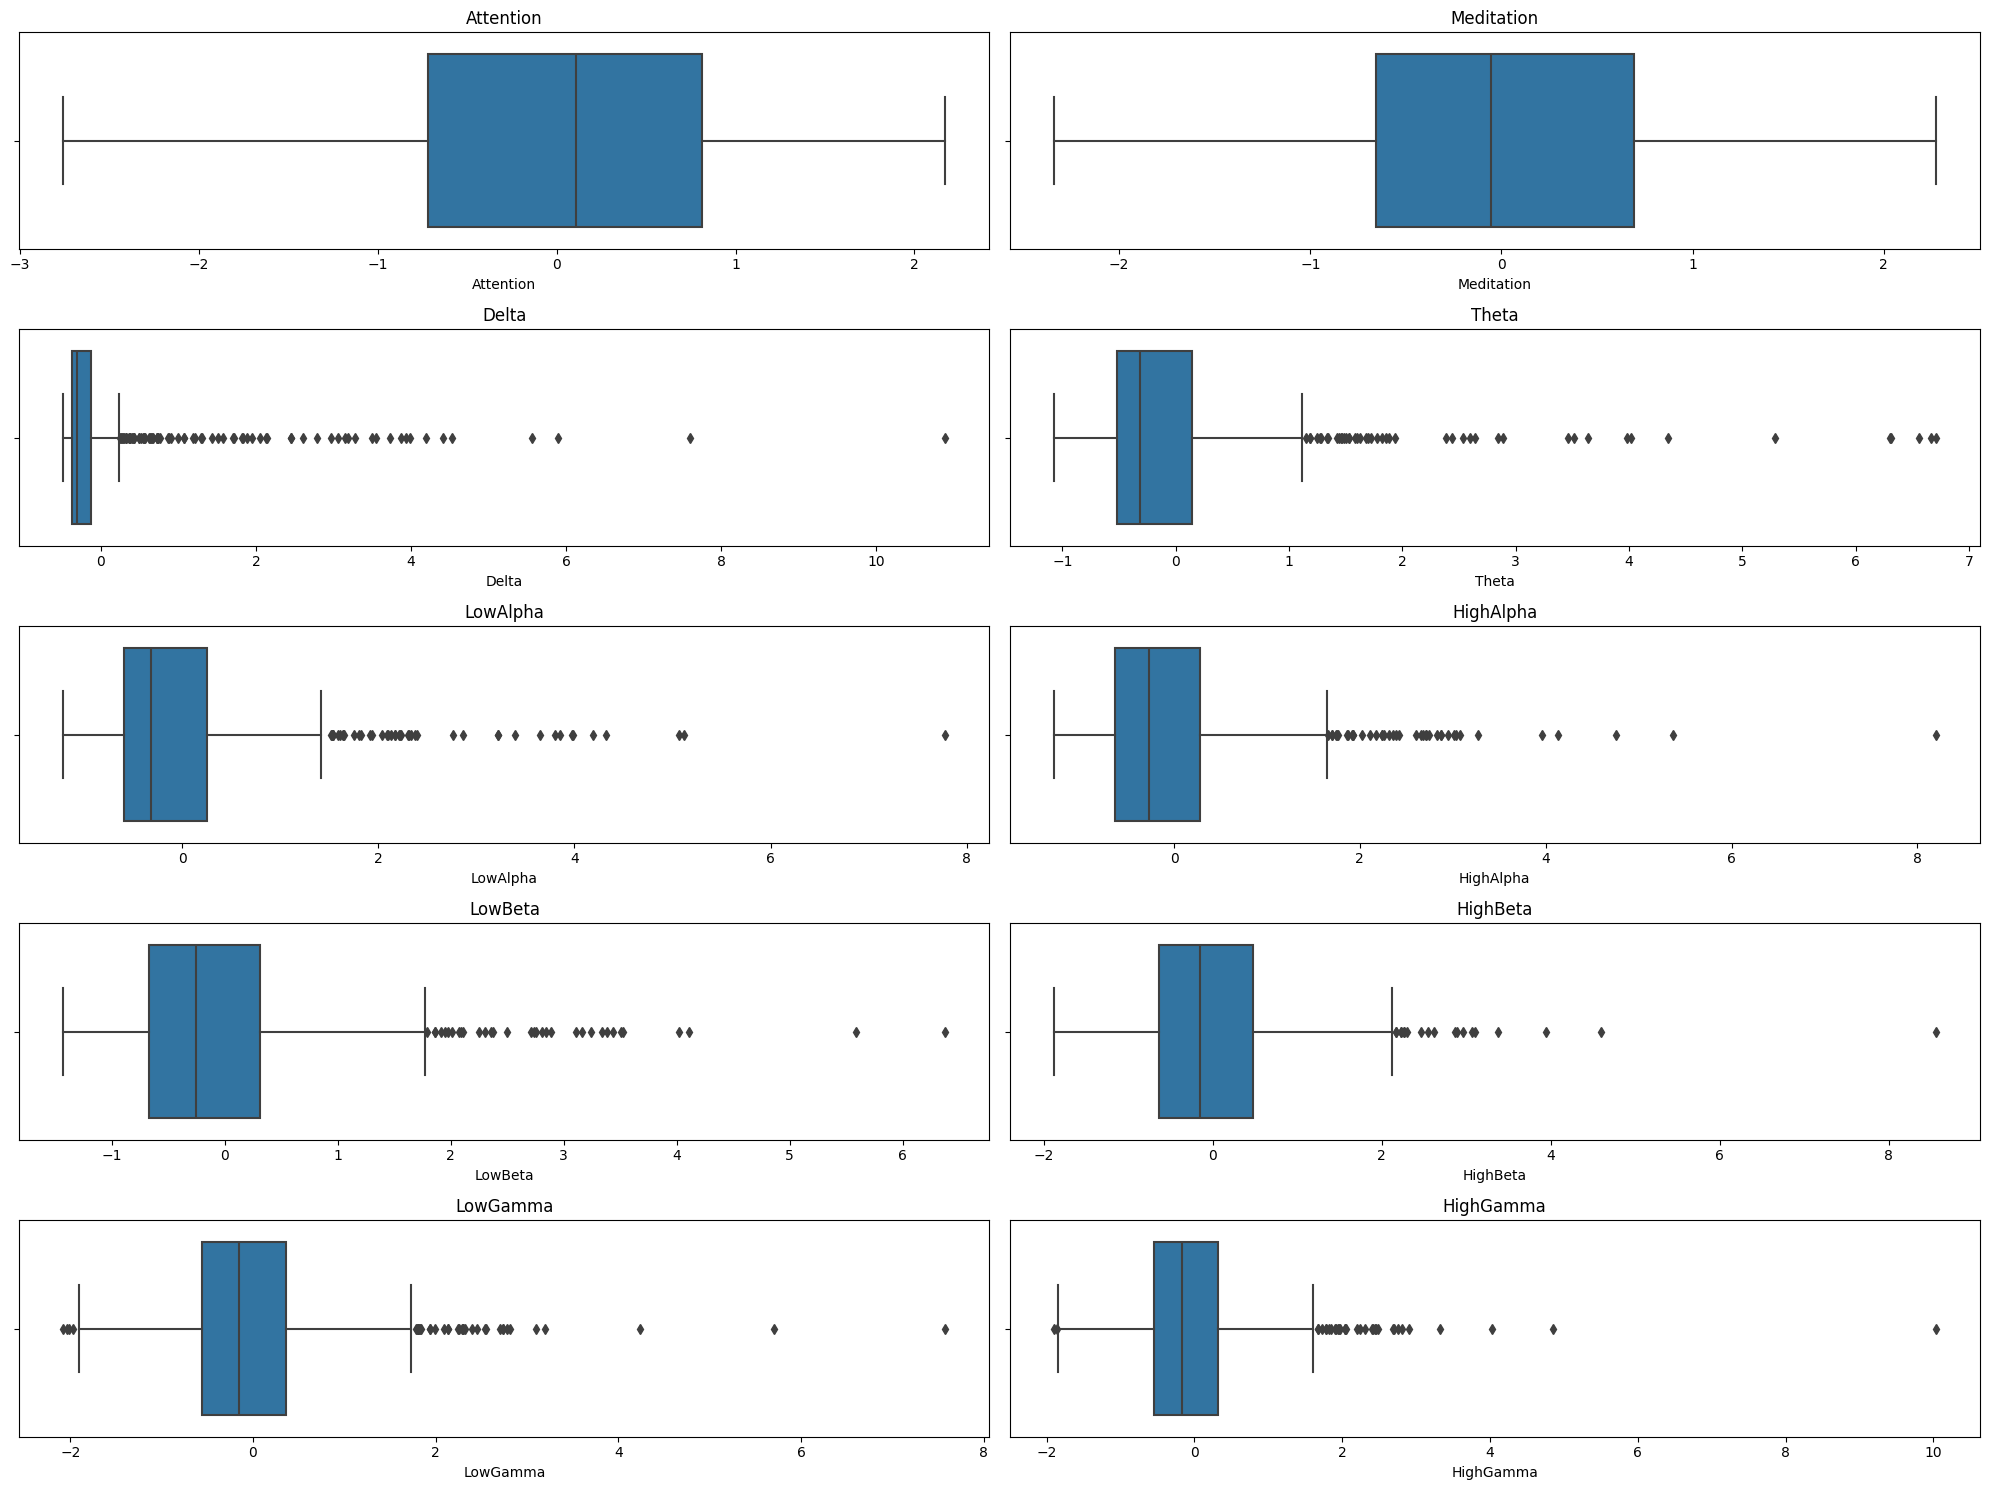

In [157]:
#https://seaborn.pydata.org/generated/seaborn.boxplot.html

display(HTML(html_h4('Analizo de que manera esta la distribución de datos en cuartiles dentro de cada caracteristica del conjunto de datos  ', 'purple')))
display(HTML(html_h4('con el dataframe datosEEG_stdscaler_after  ', 'purple')))

# Filtro el DataFrame para dejar fuera la columna Key
datosEEGTotal_csv_box1 = datosEEG_stdscaler_after.drop(['Key'],axis=1)

# Calculo el número de filas necesarias para mostrar dos boxplots por fila para que la impresion no sea muy larga
num_cols = len(datosEEGTotal_csv_box1.columns)
num_rows = (num_cols) // 2

# Defino el tamaño de la figura
plt.figure(figsize=(20, 15))

# Itero sobre cada columna del DataFrame filtrado
for i, column in enumerate(datosEEGTotal_csv_box1.columns):
    # Creo un subplot para cada columna
    plt.subplot(num_rows, 2, i + 1)
    
    # un boxplot para cada columna
    sns.boxplot(data=datosEEGTotal_csv_box1, x=column)
    
    # título como el nombre de la columna
    plt.title(column)

# Ajusto el diseño para evitar superposiciones
plt.tight_layout()


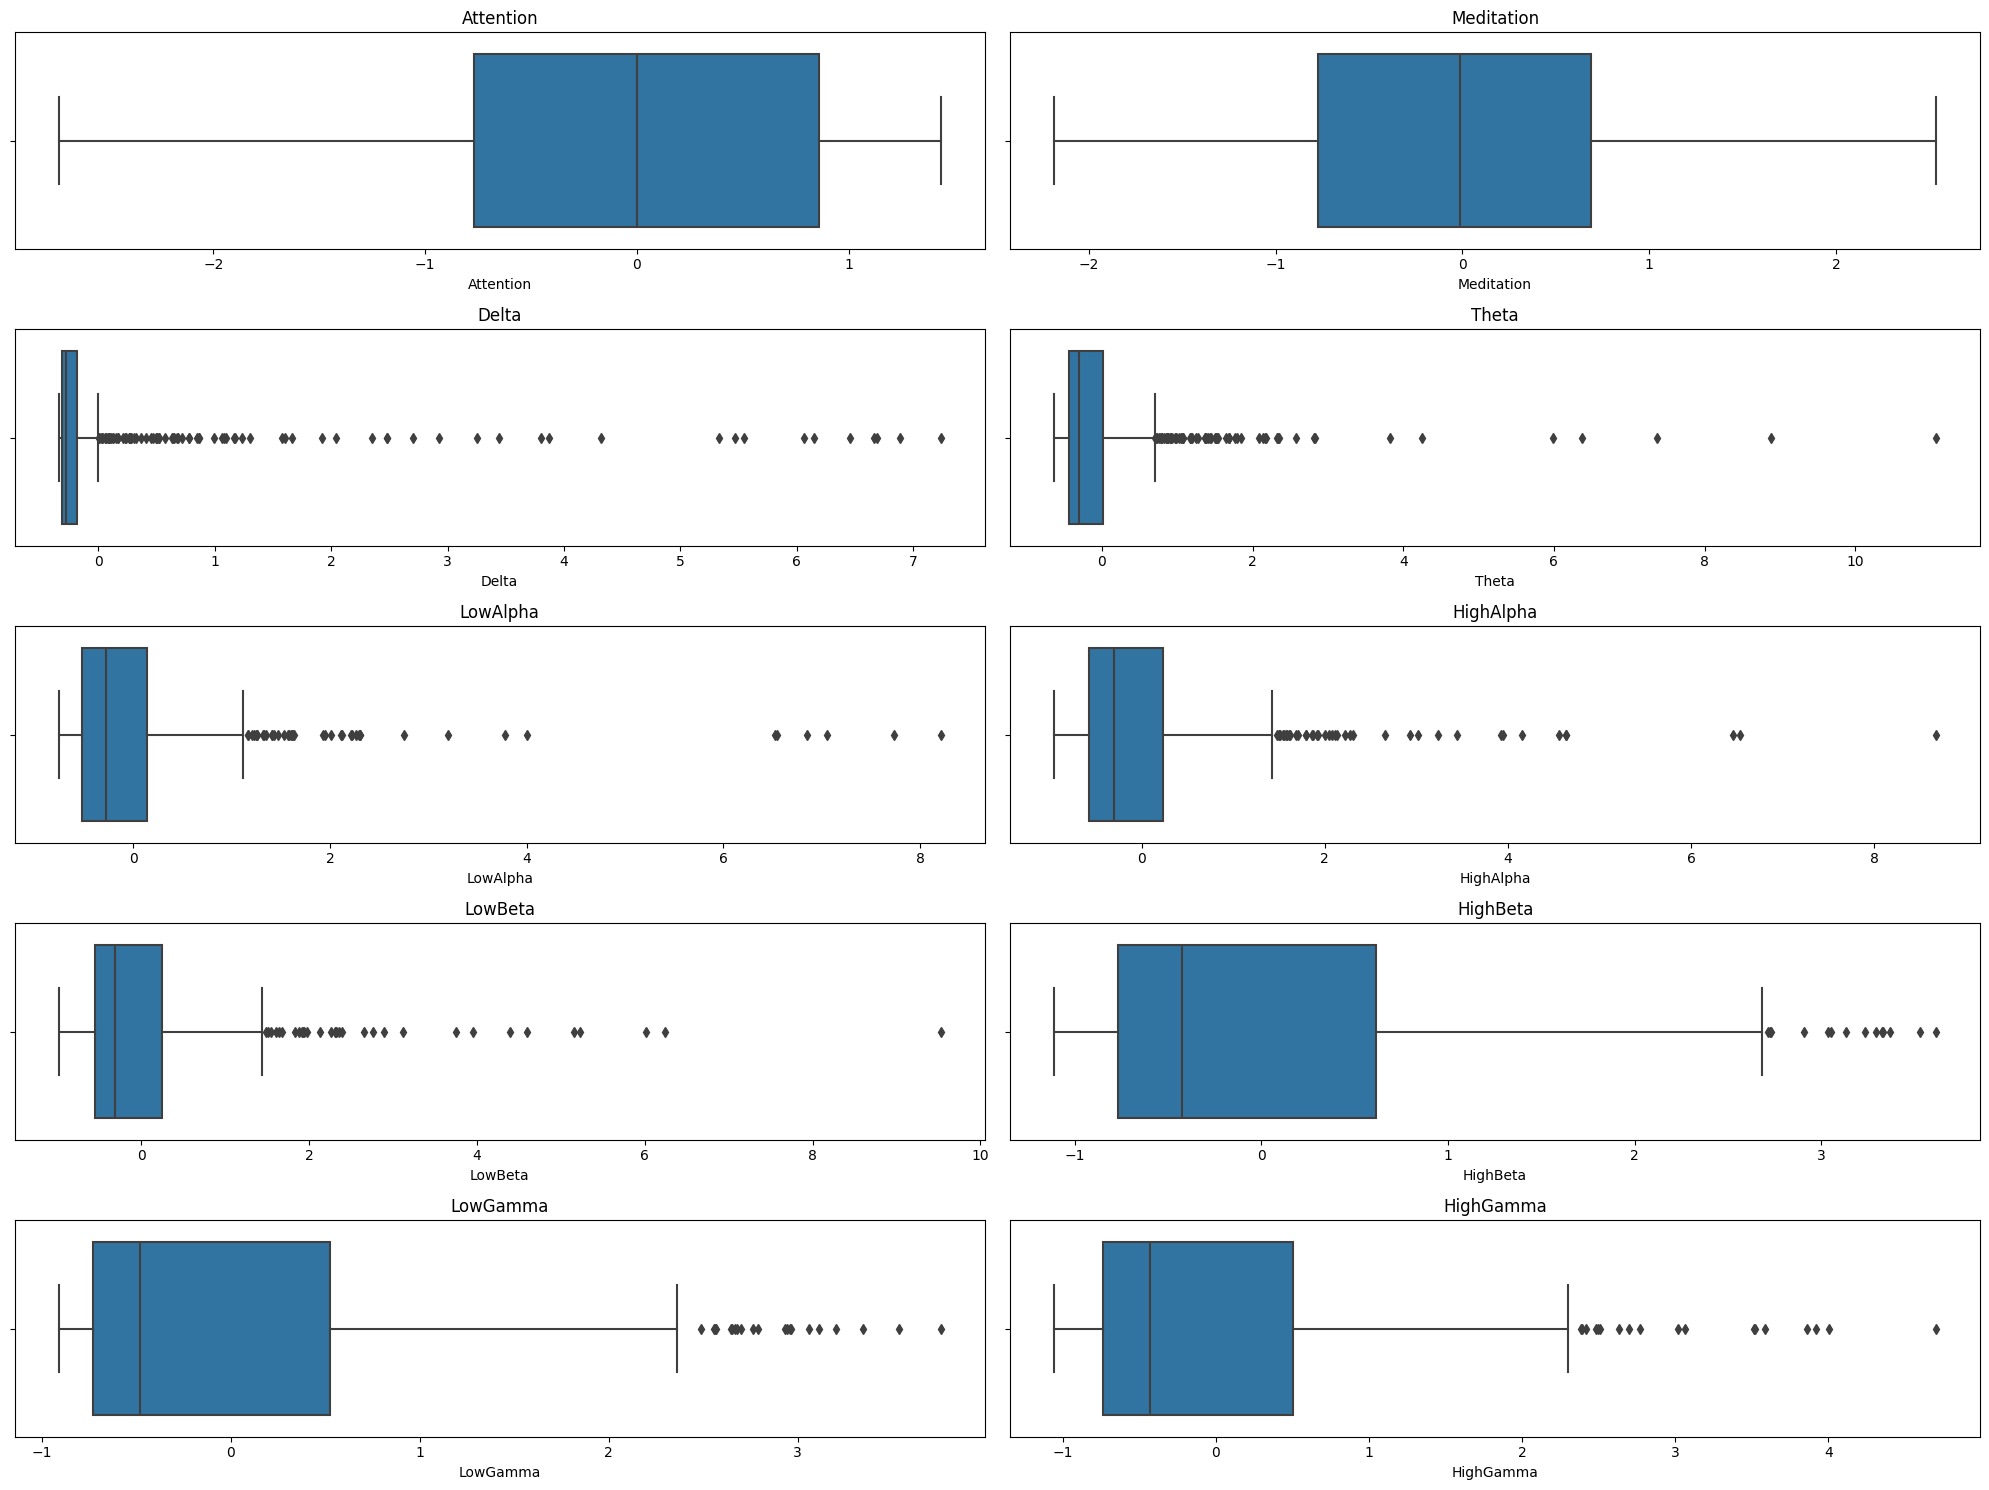

In [158]:
#https://seaborn.pydata.org/generated/seaborn.boxplot.html

display(HTML(html_h4('Analizo de que manera esta la distribución de datos en cuartiles dentro de cada caracteristica del conjunto de datos  ', 'purple')))
display(HTML(html_h4('con el dataframe datosEEG_stdscaler_before  ', 'purple')))

# Filtro el DataFrame para dejar fuera la columna Key
datosEEGTotal_csv_box2 = datosEEG_stdscaler_before.drop(['Key'],axis=1)

# Calculo el número de filas necesarias para mostrar dos boxplots por fila para que la impresion no sea muy larga
num_cols = len(datosEEGTotal_csv_box2.columns)
num_rows = (num_cols) // 2

# Defino el tamaño de la figura
plt.figure(figsize=(20, 15))

# Itero sobre cada columna del DataFrame filtrado
for i, column in enumerate(datosEEGTotal_csv_box2.columns):
    # Creo un subplot para cada columna
    plt.subplot(num_rows, 2, i + 1)
    
    # un boxplot para cada columna
    sns.boxplot(data=datosEEGTotal_csv_box2, x=column)
    
    # título como el nombre de la columna
    plt.title(column)

# Ajusto el diseño para evitar superposiciones
plt.tight_layout()

In [159]:
display(HTML(html_h5('La distancia de los datos es mucho menor que en la fase de Carga de datos.  ', 'blue')))

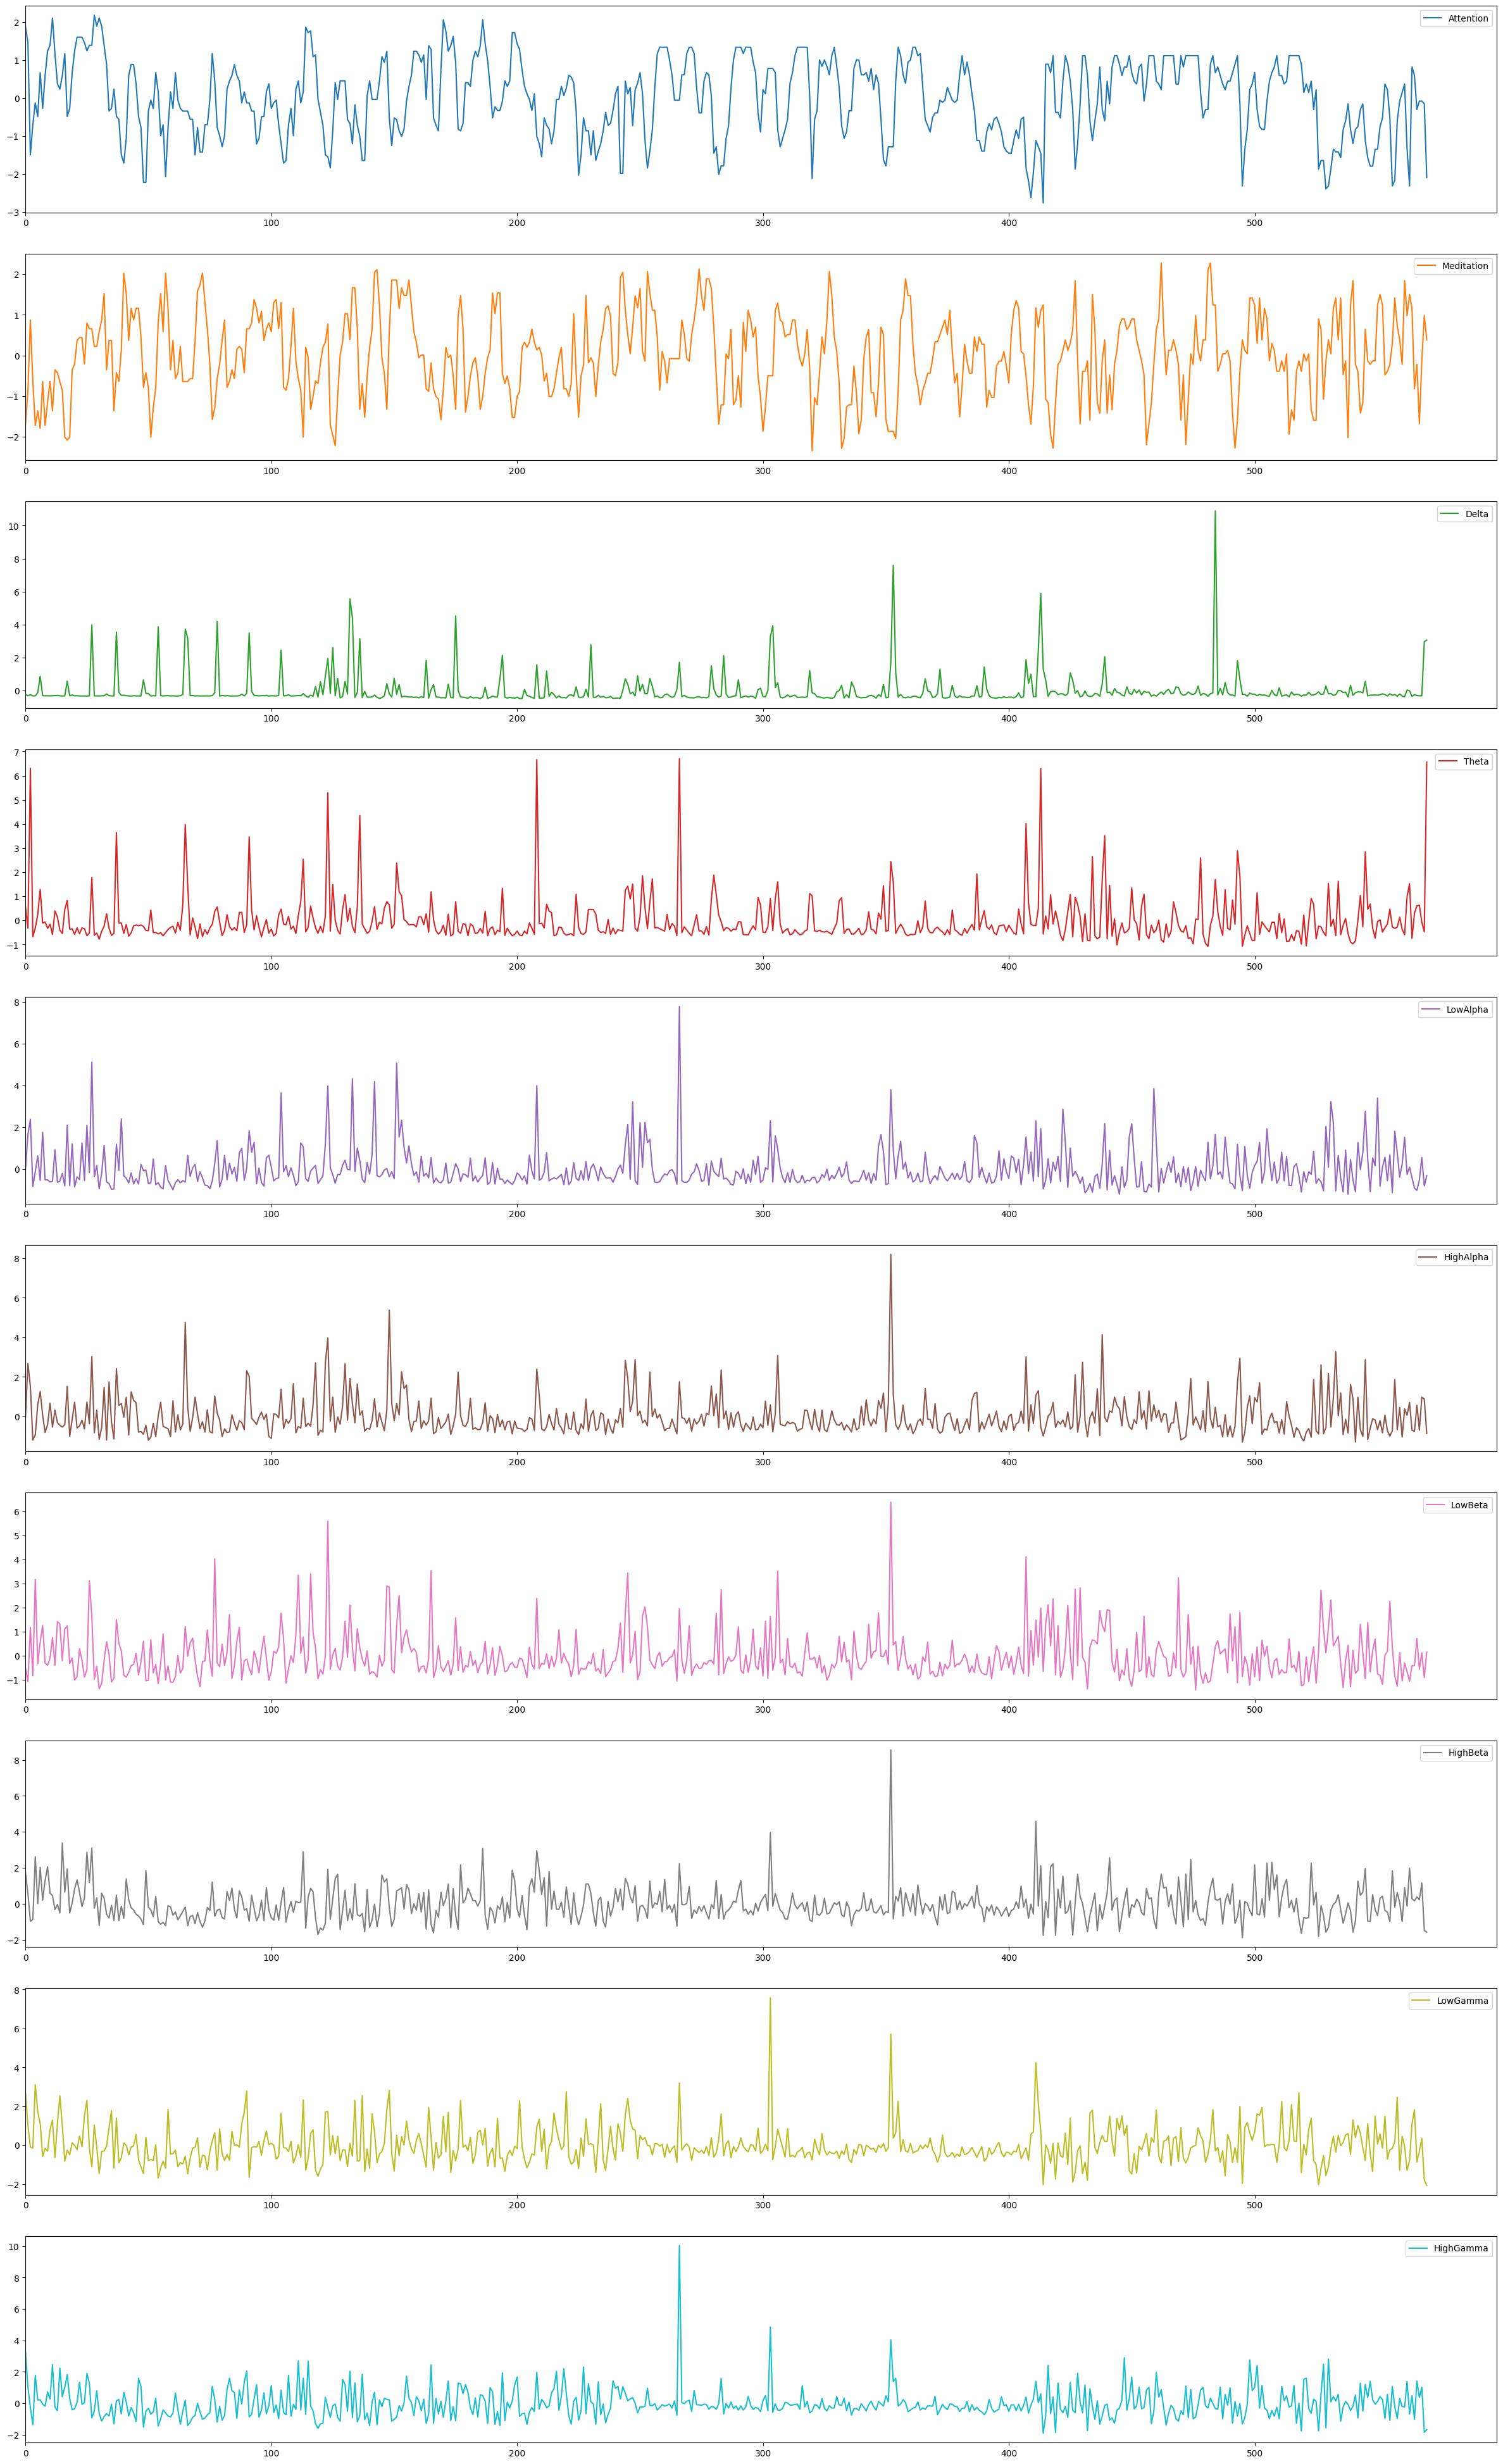

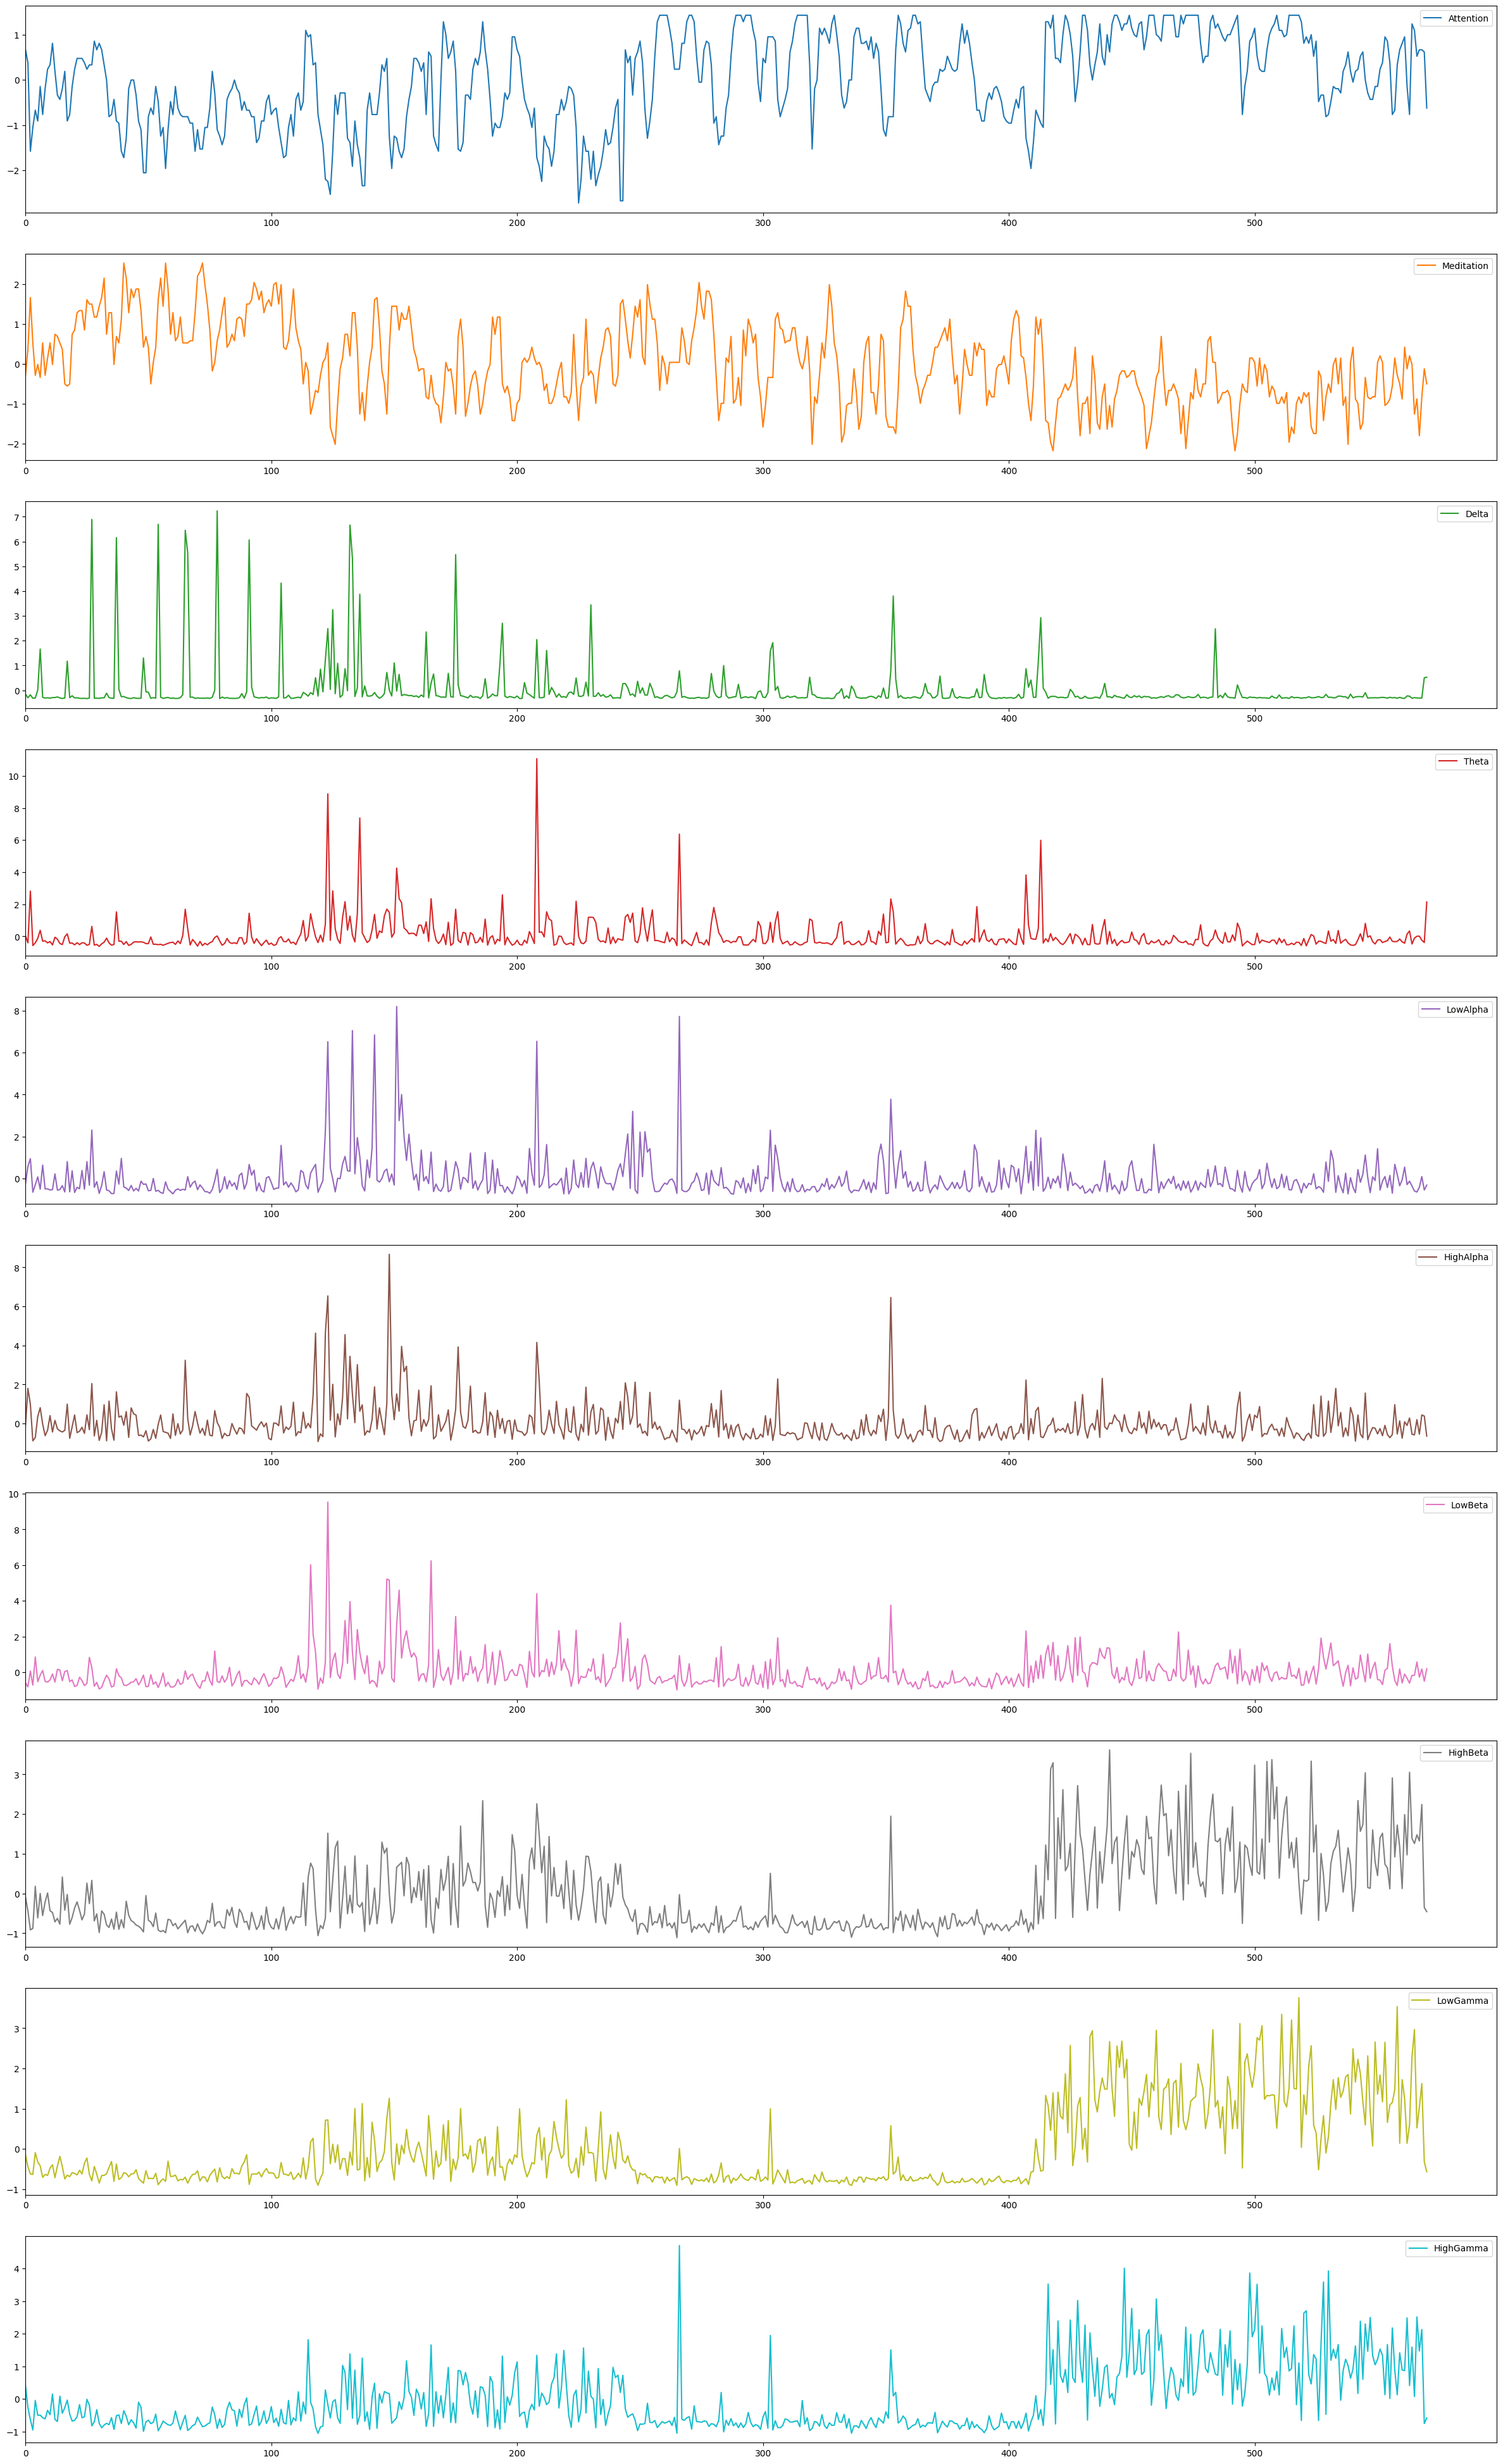

In [160]:
display()
display(HTML(html_h4('Imprimo cada una de las caracteristicas de los datos excepto Key para datosEEG_stdscaler_after: ', 'purple')))

#imprimo los datos por cada columna excluyendo Key
datosEEG_stdscaler_after.drop(['Key'],axis=1).plot(kind="line",subplots=True,sharex=False, figsize=(30,50),xlim=0)
plt.show()

display()
display(HTML(html_h4('Imprimo cada una de las caracteristicas de los datos excepto Key para datosEEG_stdscaler_before: ', 'purple')))

#imprimo los datos por cada columna excluyendo Key
datosEEG_stdscaler_before.drop(['Key'],axis=1).plot(kind="line",subplots=True,sharex=False, figsize=(30,50),xlim=0)
plt.show()



display(HTML(html_h5('Las graficas se observan mas limpias y se pueden observar como oscilan los datos, no como en Carga de datos: ', 'blue')))

In [161]:
#https://www.codetodevs.com/correlacion-variables-pairplot-seaborn/
#display(HTML(html_h4('Muestro los graficos de dispersión de los datos despues de limpieza y normalizacion de datos', 'purple')))

#sns.pairplot(datosEEGTotal_nor_sinoutliers)

In [162]:
datosEEG_stdscaler_before.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Attention   571 non-null    float64
 1   Meditation  571 non-null    float64
 2   Delta       571 non-null    float64
 3   Theta       571 non-null    float64
 4   LowAlpha    571 non-null    float64
 5   HighAlpha   571 non-null    float64
 6   LowBeta     571 non-null    float64
 7   HighBeta    571 non-null    float64
 8   LowGamma    571 non-null    float64
 9   HighGamma   571 non-null    float64
 10  Key         571 non-null    float64
dtypes: float64(11)
memory usage: 49.2 KB


In [163]:
datosEEG_seg1_stdscaler.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Attention   114 non-null    float64
 1   Meditation  114 non-null    float64
 2   Delta       114 non-null    float64
 3   Theta       114 non-null    float64
 4   LowAlpha    114 non-null    float64
 5   HighAlpha   114 non-null    float64
 6   LowBeta     114 non-null    float64
 7   HighBeta    114 non-null    float64
 8   LowGamma    114 non-null    float64
 9   HighGamma   114 non-null    float64
 10  Key         114 non-null    float64
dtypes: float64(11)
memory usage: 9.9 KB


In [164]:
display(HTML(html_h4('Tambien exportare a csv todos los dataframes generados del conjunto de datos sin TimeStamp, Total 6 archivos ', 'purple')))

datosEEG_stdscaler_after.to_csv(f'../datos/csv/all_stscaler_after.csv', index=False)
datosEEG_stdscaler_before.to_csv(f'../datos/csv/all_stscaler_before.csv', index=False)
datosEEG_seg1_stdscaler.to_csv(f'../datos/csv/seg1_stscaler.csv', index=False)
datosEEG_seg2_stdscaler.to_csv(f'../datos/csv/seg2_stscaler.csv', index=False)
datosEEG_seg3_stdscaler.to_csv(f'../datos/csv/seg3_stscaler.csv', index=False)
datosEEG_seg4_stdscaler.to_csv(f'../datos/csv/seg4_stscaler.csv', index=False)
